#Progetto BISF

In [20]:
#Importo le librerie necessarie al funzionamento del notebook
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import scipy.optimize as sco
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.signal import savgol_filter
from matplotlib import style

#Importo i dati dei titoli scelti
#Settore tecnologico: AVGO, NVDA
#Settore sanitario: LLY, PFE
#Settori finanziario: BRK.B, BLK

In [21]:
start_date = '2014-05-31'
end_date = '2024-05-31'
selected_stocks = ["AVGO","NVDA","LLY","PFE","BRK-B","BLK"]

stocks_data = yf.download(selected_stocks, start=start_date, end=end_date)
stocks_data.head()

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                          \
Ticker           AVGO         BLK       BRK-B        LLY      NVDA        PFE   
Date                                                                            
2014-06-02  54.481544  237.437515  127.879997  48.572342  4.507795  19.234701   
2014-06-03  54.337032  239.439194  126.930000  48.458038  4.488755  19.157009   
2014-06-04  54.458717  241.099655  127.230003  48.351906  4.493514  19.189381   
2014-06-05  54.656448  241.966095  128.199997  48.645821  4.512554  19.267071   
2014-06-06  54.473927  245.112488  128.649994  48.686653  4.529215  19.046944   

Price           Close                                     ...        Open  \
Ticker           AVGO         BLK       BRK-B        LLY  ...       BRK-B   
Date                                                      ...               
2014-06-02  71.639999  306.029999  127.879997  59.490002  ...  128.279999   
2014-06-03  71.449997  308.609985  126.930000  59.349998  ...  127.290001   
2014-06-04  71.610001  310.750000  127.230003  59.220001  ...  127.000000   
2014-06-05  71.870003  309.929993  128.199997  59.580002  ...  127.559998   
2014-06-06  71.629997  313.959991  128.649994  59.630001  ...  128.199997   

Price                                      Volume                            \
Ticker            LLY    NVDA        PFE     AVGO     BLK    BRK-B      LLY   
Date                                                                          
2014-06-02  59.750000  4.7650  28.074003  2659900  404200  2007200  3405700   
2014-06-03  59.310001  4.7450  28.244781  2230800  719300  2445000  2798200   
2014-06-04  59.180000  4.7025  28.092979  1937900  558200  1760000  2997400   
2014-06-05  59.279999  4.7275  28.168880  2728800  566400  2165000  2753800   
2014-06-06  59.849998  4.7625  28.282732  1586600  457000  2241500  2551300   

Price                           
Ticker          NVDA       PFE  
Date                            
2014-06-02  18150000  21079051  
2014-06-03  24321200  25506695  
2014-06-04  16123600  24670767  
2014-06-05  18869600  20402910  
2014-06-06  16105200  28265223  

[5 rows x 36 columns]

In [22]:
# informazioni sul dataset
stocks_data.describe()

Price     Adj Close                                                      \
Ticker         AVGO          BLK        BRK-B          LLY         NVDA   
count   2514.000000  2514.000000  2514.000000  2514.000000  2514.000000   
mean     343.369488   484.014253   223.016523   184.413380   132.016566   
std      286.588141   190.190465    75.535534   171.237412   180.105272   
min       52.912537   234.524841   124.129997    48.033474     4.013763   
25%      138.691734   308.473885   158.232494    70.443462    22.658599   
50%      234.746483   432.637558   204.900002   106.403118    58.326714   
75%      463.459045   655.952850   283.917503   245.687176   169.257481   
max     1436.170044   908.263184   420.519989   808.450012  1064.689941   

Price                      Close                                         ...  \
Ticker          PFE         AVGO          BLK        BRK-B          LLY  ...   
count   2514.000000  2514.000000  2514.000000  2514.000000  2514.000000  ...   
mean      30.041876   374.604686   536.428218   223.016523   192.443421  ...   
std        7.839007   278.882138   178.240069    75.535534   168.704170  ...   
min       18.091608    69.040001   289.720001   124.129997    58.830002  ...   
25%       23.838576   176.452499   374.447502   158.232494    80.872501  ...   
50%       28.515430   273.970001   489.930008   204.900002   114.910000  ...   
75%       33.721774   493.135002   687.979980   283.917503   252.725006  ...   
max       55.076656  1436.170044   971.489990   420.519989   808.450012  ...   

Price          Open                                               Volume  \
Ticker        BRK-B          LLY         NVDA          PFE          AVGO   
count   2514.000000  2514.000000  2514.000000  2514.000000  2.514000e+03   
mean     223.074523   192.333262   132.193139    36.236585  2.765427e+06   
std       75.566895   168.673665   179.919707     6.794874  1.914492e+06   
min      124.110001    58.759998     4.232500    25.330000  4.123000e+05   
25%      158.367504    80.839996    23.058750    31.577325  1.746200e+06   
50%      204.900002   114.824997    58.802502    34.479088  2.294050e+06   
75%      284.297493   252.707497   168.827499    39.900002  3.130225e+06   
max      423.839996   810.000000  1044.489990    60.599998  4.350830e+07   

Price                                                                         
Ticker           BLK         BRK-B           LLY          NVDA           PFE  
count   2.514000e+03  2.514000e+03  2.514000e+03  2.514000e+03  2.514000e+03  
mean    6.625379e+05  4.098223e+06  4.166440e+06  4.655738e+07  2.832935e+07  
std     4.422790e+05  1.922174e+06  4.217360e+06  2.551631e+07  1.596816e+07  
min     1.264000e+05  6.720000e+04  6.272000e+05  4.564400e+06  5.187683e+06  
25%     4.560250e+05  2.949925e+06  2.600175e+06  3.009370e+07  1.922248e+07  
50%     5.757000e+05  3.626800e+06  3.370500e+06  4.131470e+07  2.452248e+07  
75%     7.588750e+05  4.639975e+06  4.546875e+06  5.641910e+07  3.283566e+07  
max     1.180410e+07  2.229380e+07  7.482250e+07  3.692928e+08  2.998294e+08  

[8 rows x 36 columns]

In [23]:
# controllo se ci sono valori nulli
stocks_data.isnull().sum()

Price      Ticker
Adj Close  AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
Close      AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
High       AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
Low        AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
Open       AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
Volume     AVGO      0
           BLK       0
           BRK-B     0
           LLY       0
           NVDA      0
           PFE       0
dtype: int64

In [24]:
# df con solo i prezzi di chiusura
adj_close_data = stocks_data['Adj Close']
adj_close_data.head()

Ticker           AVGO         BLK       BRK-B        LLY      NVDA        PFE
Date                                                                         
2014-06-02  54.481544  237.437515  127.879997  48.572342  4.507795  19.234701
2014-06-03  54.337032  239.439194  126.930000  48.458038  4.488755  19.157009
2014-06-04  54.458717  241.099655  127.230003  48.351906  4.493514  19.189381
2014-06-05  54.656448  241.966095  128.199997  48.645821  4.512554  19.267071
2014-06-06  54.473927  245.112488  128.649994  48.686653  4.529215  19.046944

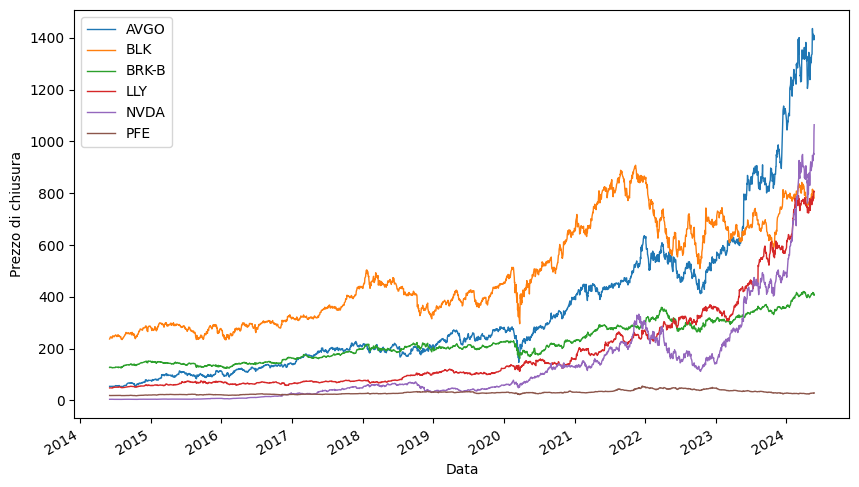

In [25]:
# grafico andamento dei prezzi di chiusura di tutti i titoli
adj_close_data.plot(figsize=(10, 6), linewidth=1)
plt.legend()
plt.ylabel('Prezzo di chiusura')
plt.xlabel('Data')
plt.show()

In [27]:
# rendimenti semplici
simple_returns = stocks_data['Adj Close'].pct_change()
simple_returns_m = simple_returns.groupby(pd.Grouper(freq='ME')).mean()
simple_returns.dropna(inplace=True)
simple_returns.head()

Ticker          AVGO       BLK     BRK-B       LLY      NVDA       PFE
Date                                                                  
2014-06-03 -0.002652  0.008430 -0.007429 -0.002353 -0.004224 -0.004039
2014-06-04  0.002239  0.006935  0.002364 -0.002190  0.001060  0.001690
2014-06-05  0.003631  0.003594  0.007624  0.006079  0.004237  0.004049
2014-06-06 -0.003339  0.013003  0.003510  0.000839  0.003692 -0.011425
2014-06-09  0.002234  0.001943 -0.005130  0.001845  0.001051 -0.002379

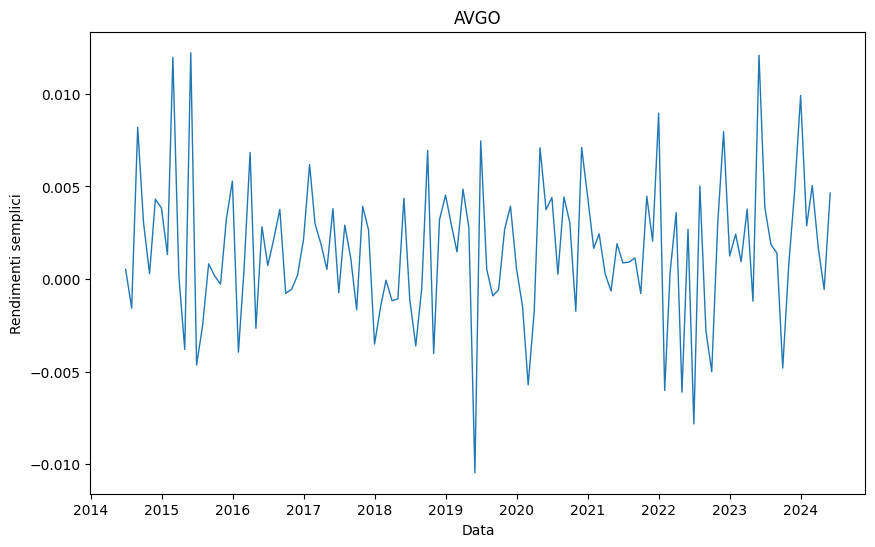

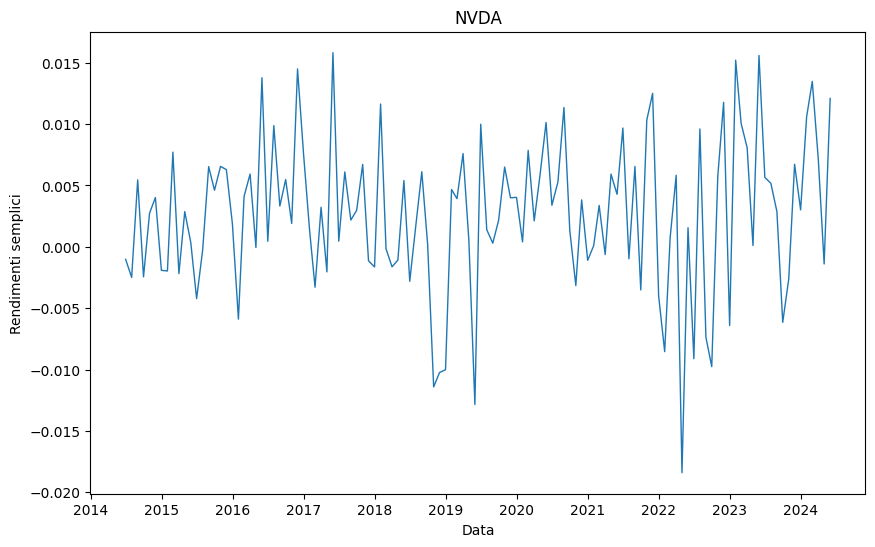

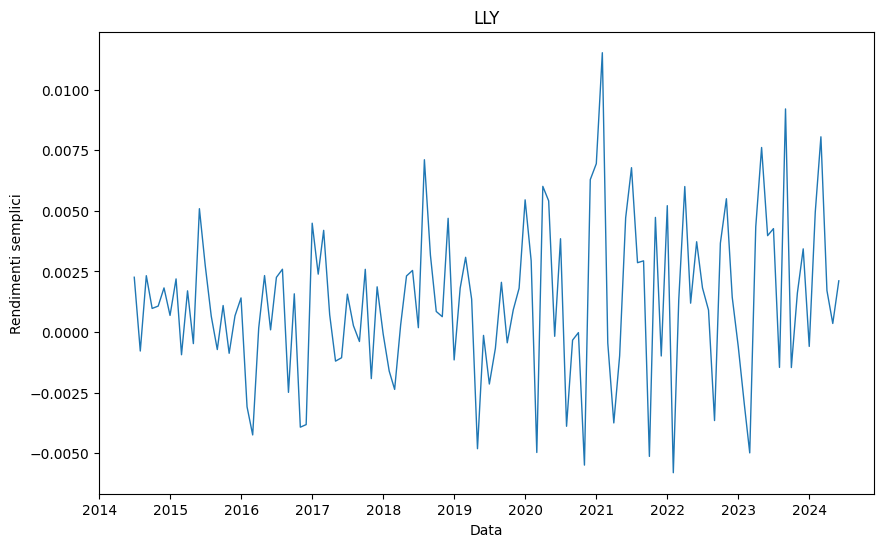

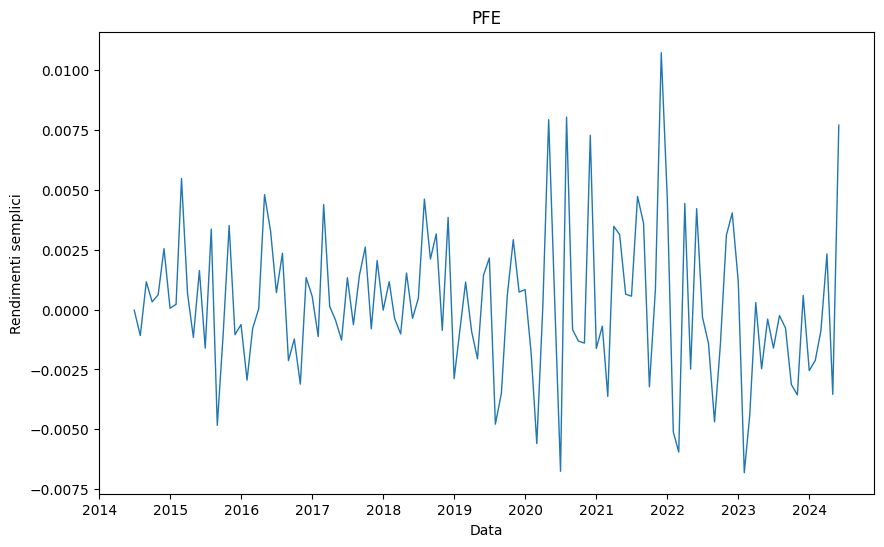

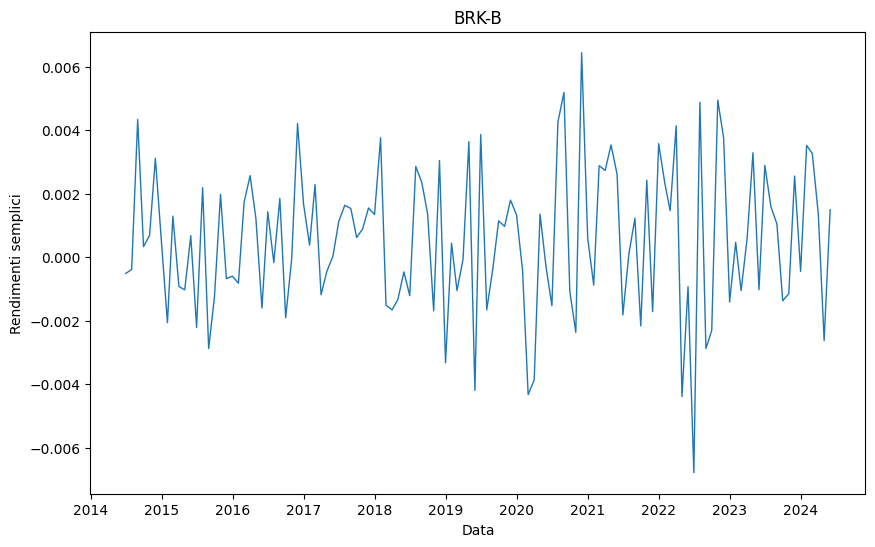

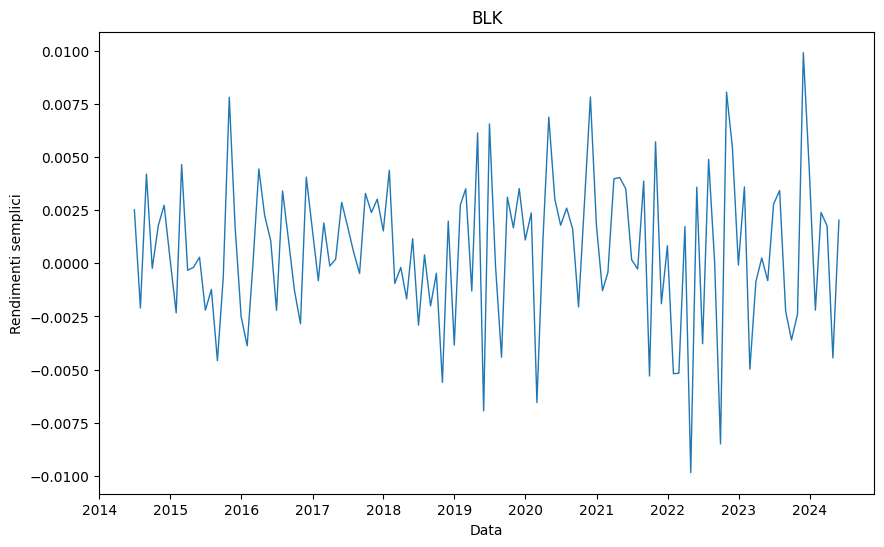

In [28]:
# grafico dei rendimenti semplici
for ticker in selected_stocks:
    plt.figure(figsize=(10, 6))
    plt.plot(simple_returns_m[ticker], linewidth=1)
    plt.ylabel('Rendimenti semplici')
    plt.xlabel('Data')
    plt.title(ticker)
    plt.show()

In [29]:
# rendimenti logaritmici
log_returns = np.log(adj_close_data / adj_close_data.shift(1))
log_returns_m = log_returns.groupby(pd.Grouper(freq='ME')).mean()
log_returns.dropna(inplace=True)
log_returns.head()

Ticker          AVGO       BLK     BRK-B       LLY      NVDA       PFE
Date                                                                  
2014-06-03 -0.002656  0.008395 -0.007457 -0.002356 -0.004233 -0.004047
2014-06-04  0.002237  0.006911  0.002361 -0.002193  0.001060  0.001688
2014-06-05  0.003624  0.003587  0.007595  0.006060  0.004228  0.004040
2014-06-06 -0.003345  0.012920  0.003504  0.000839  0.003685 -0.011491
2014-06-09  0.002231  0.001941 -0.005143  0.001843  0.001050 -0.002382

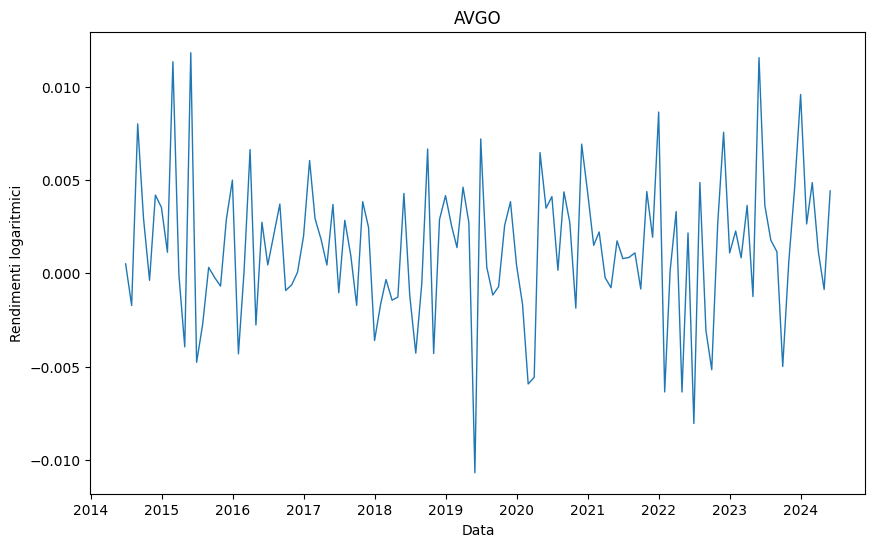

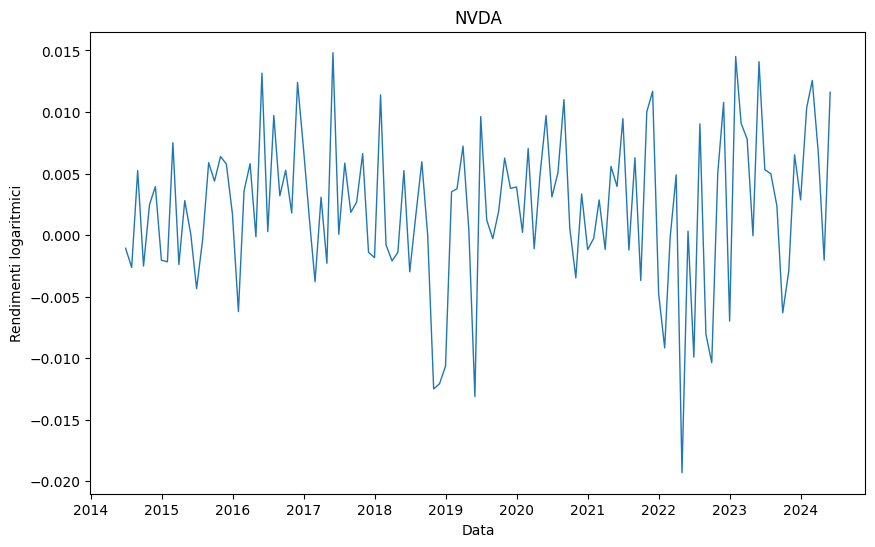

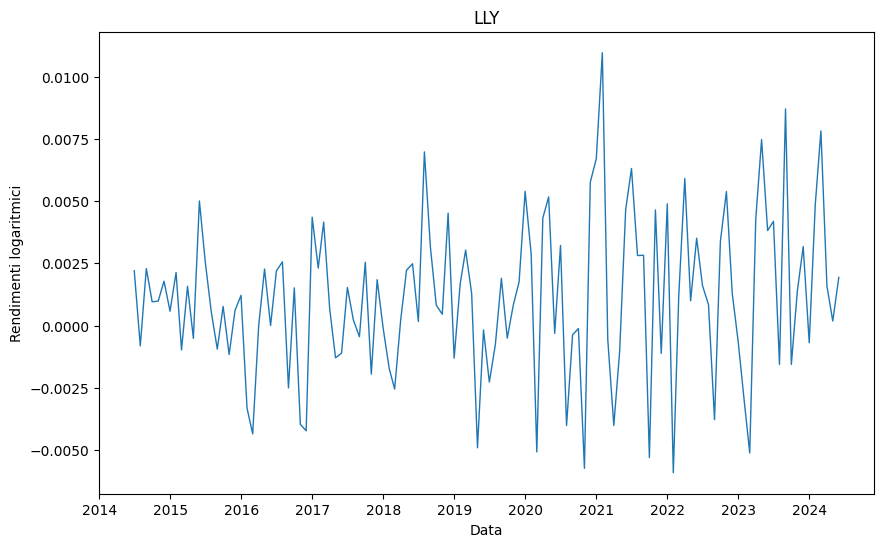

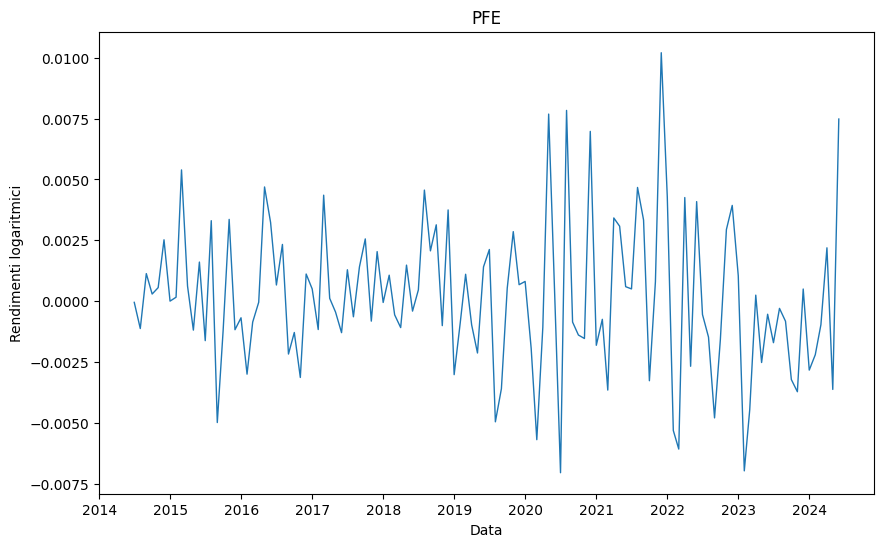

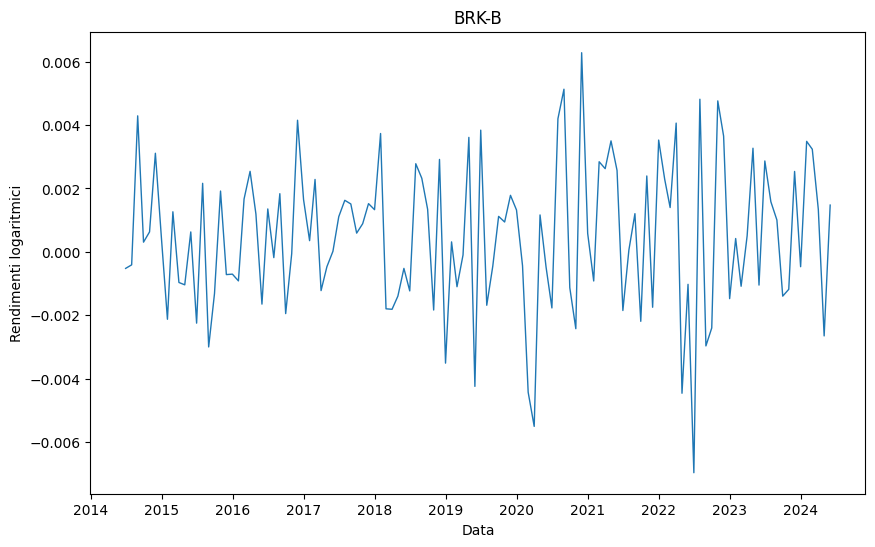

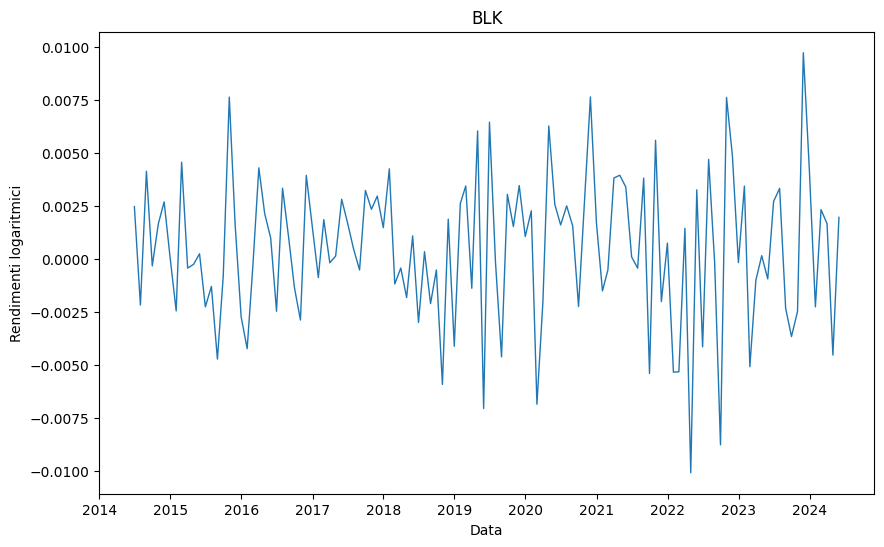

In [30]:
# grafico dei rendimenti logaritmici
for ticker in selected_stocks:
    plt.figure(figsize=(10, 6))
    plt.plot(log_returns_m[ticker], linewidth=1)
    plt.ylabel('Rendimenti logaritmici')
    plt.xlabel('Data')
    plt.title(ticker)
    plt.show()

In [33]:
# aggregazione annuale dei prezzi di chiusura
adj_close_y = adj_close_data.groupby(pd.Grouper(freq='YE')).mean()

In [34]:
# rendimenti cumulati annuali
adj_cum_rtn_y = np.cumprod(1 + simple_returns)
adj_cum_rtn_y.dropna(inplace=True)
adj_cum_rtn_y

Ticker           AVGO       BLK     BRK-B        LLY        NVDA       PFE
Date                                                                      
2014-06-03   0.997348  1.008430  0.992571   0.997647    0.995776  0.995961
2014-06-04   0.999581  1.015424  0.994917   0.995462    0.996832  0.997644
2014-06-05   1.003210  1.019073  1.002502   1.001513    1.001056  1.001683
2014-06-06   0.999860  1.032324  1.006021   1.002353    1.004752  0.990239
2014-06-09   1.002093  1.034330  1.000860   1.004202    1.005808  0.987883
...               ...       ...       ...        ...         ...       ...
2024-05-20  25.954294  3.391166  3.229590  16.123991  210.257990  1.483257
2024-05-21  25.682090  3.390071  3.240303  16.535542  211.602328  1.484816
2024-05-22  25.554341  3.367665  3.237332  16.530189  210.635118  1.538885
2024-05-23  25.573615  3.304238  3.173913  16.644246  230.265554  1.491575
2024-05-24  25.840676  3.293077  3.185877  16.623246  236.188616  1.501453

[2513 rows x 6 columns]

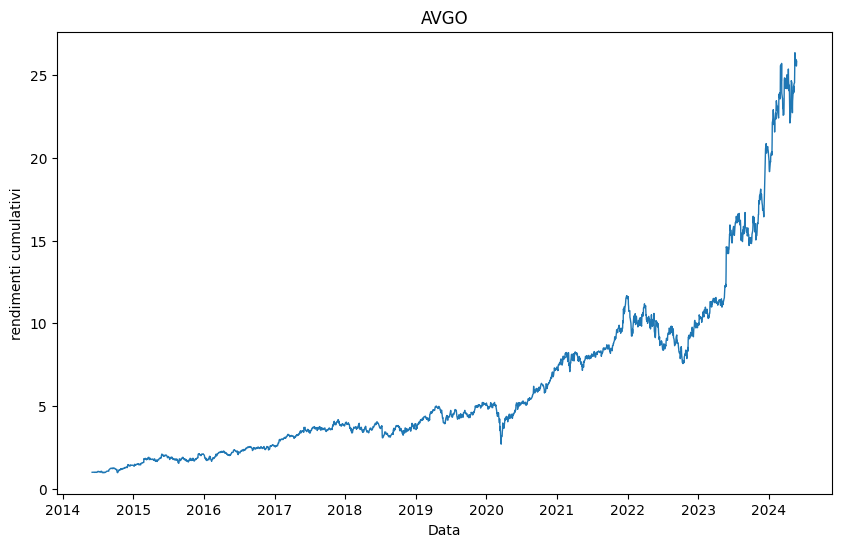

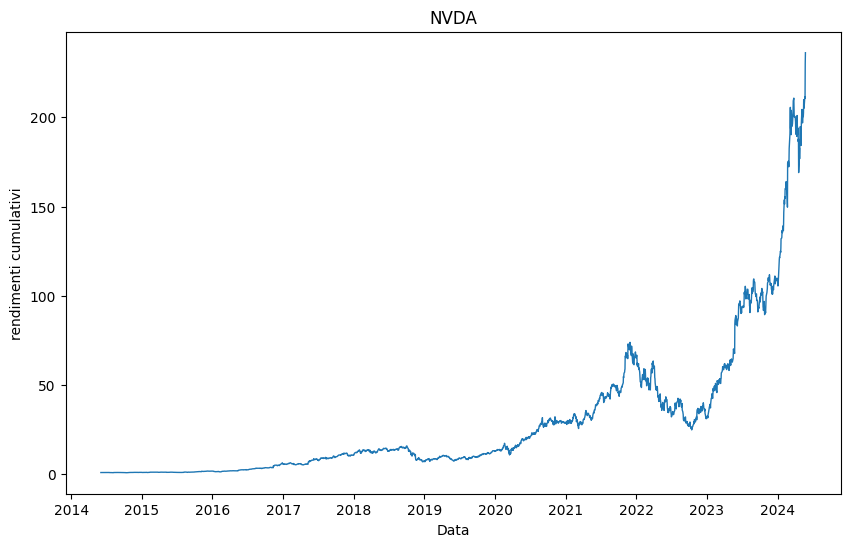

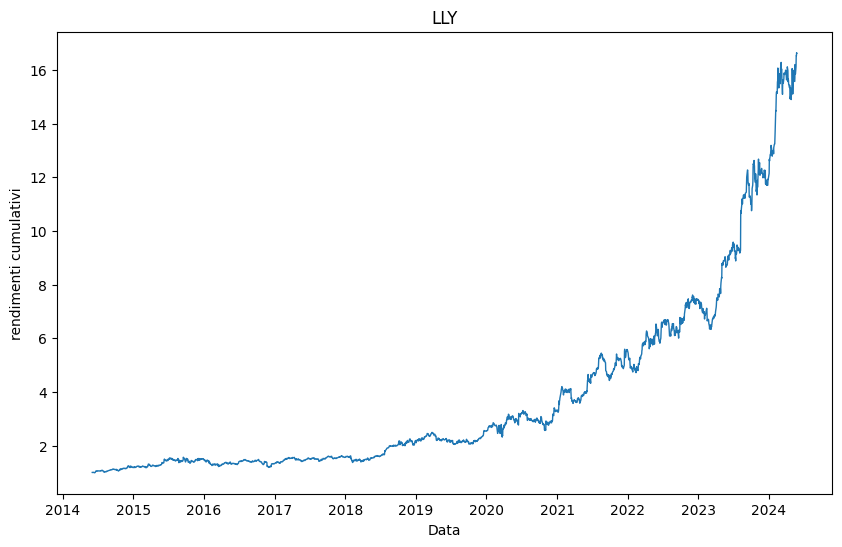

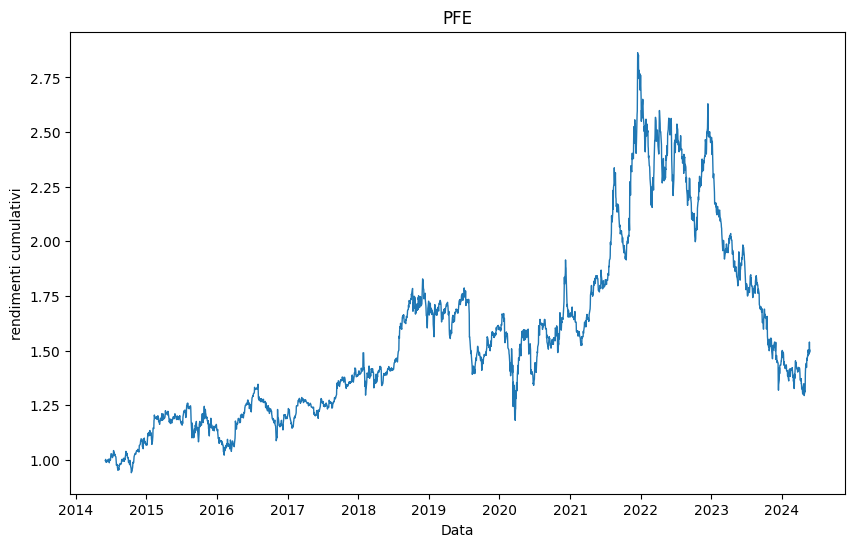

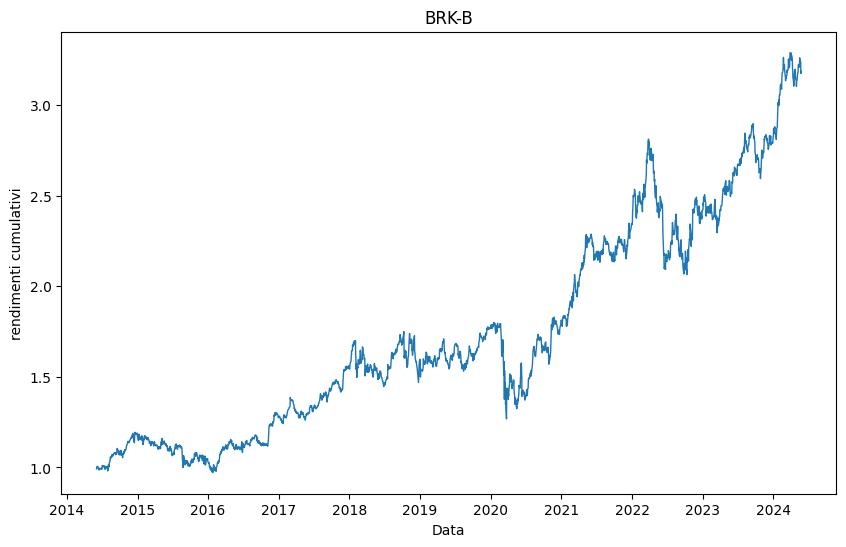

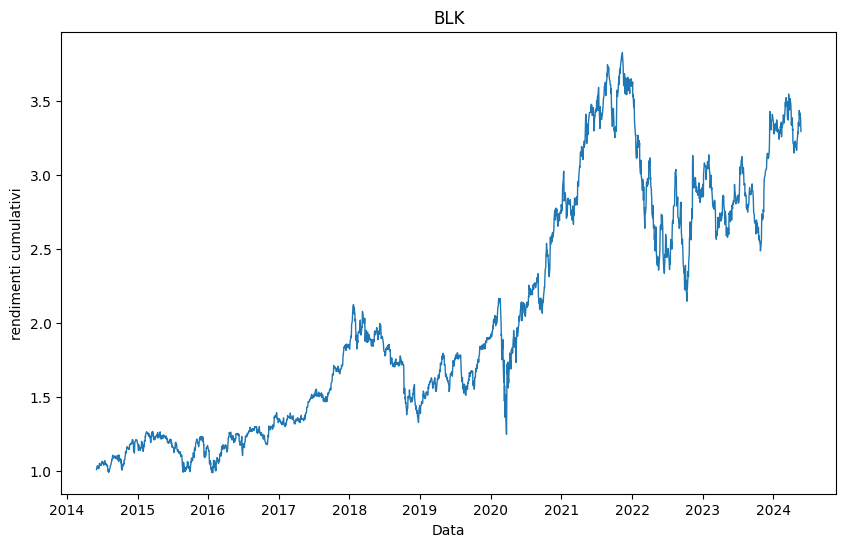

In [36]:
# grafico rendimenti cumulati annuali
for ticker in selected_stocks:
    plt.figure(figsize=(10, 6))
    plt.plot(adj_cum_rtn_y[ticker], linewidth=1)
    plt.ylabel('rendimenti cumulativi')
    plt.xlabel('Data')
    plt.title(ticker)
    plt.show()

In [37]:
# rendimenti composti annuali
adj_comp_rtn_y = np.log(adj_close_y / adj_close_y.shift(1))
adj_comp_rtn_y.dropna(inplace=True)
adj_comp_rtn_y

Ticker          AVGO       BLK     BRK-B       LLY      NVDA       PFE
Date                                                                  
2015-12-31  0.436897  0.071098  0.021573  0.219661  0.228249  0.147835
2016-12-31  0.237190  0.034775  0.027320 -0.005471  0.832395  0.008661
2017-12-31  0.425109  0.215937  0.195258  0.099625  1.030057  0.075622
2018-12-31  0.044281  0.172233  0.150505  0.157014  0.441813  0.176448
2019-12-31  0.225337 -0.065386  0.022084  0.240586 -0.282229  0.053604
2020-12-31  0.158157  0.249153 -0.014826  0.265549  0.820894 -0.041021
2021-12-31  0.462506  0.437091  0.285351  0.430090  0.681123  0.228561
2022-12-31  0.119425 -0.184594  0.110225  0.328184 -0.049408  0.199031
2023-12-31  0.400170  0.035327  0.096150  0.424518  0.678593 -0.264781
2024-12-31  0.500074  0.156430  0.174768  0.459981  0.769915 -0.254753

In [38]:
# info sui rendimenti logaritmici
log_returns.describe()

Ticker         AVGO          BLK        BRK-B          LLY         NVDA  \
count   2513.000000  2513.000000  2513.000000  2513.000000  2513.000000   
mean       0.001294     0.000474     0.000461     0.001119     0.002175   
std        0.022186     0.017150     0.012114     0.016911     0.029549   
min       -0.222055    -0.146815    -0.100838    -0.111094    -0.207712   
25%       -0.009928    -0.007746    -0.005310    -0.006774    -0.011689   
50%        0.001324     0.000794     0.000482     0.000960     0.002387   
75%        0.012690     0.008744     0.006538     0.008845     0.016807   
max        0.146985     0.126843     0.109840     0.145655     0.260876   

Ticker          PFE  
count   2513.000000  
mean       0.000162  
std        0.014351  
min       -0.080501  
25%       -0.006715  
50%        0.000000  
75%        0.007010  
max        0.103055

In [39]:
# info sui rendimenti semplici
simple_returns.describe()

Ticker         AVGO          BLK        BRK-B          LLY         NVDA  \
count   2513.000000  2513.000000  2513.000000  2513.000000  2513.000000   
mean       0.001541     0.000621     0.000535     0.001263     0.002616   
std        0.022146     0.017151     0.012108     0.017054     0.029800   
min       -0.199129    -0.136546    -0.095921    -0.105145    -0.187559   
25%       -0.009879    -0.007716    -0.005296    -0.006751    -0.011621   
50%        0.001325     0.000794     0.000482     0.000960     0.002390   
75%        0.012771     0.008782     0.006559     0.008885     0.016949   
max        0.158337     0.135239     0.116099     0.156797     0.298067   

Ticker          PFE  
count   2513.000000  
mean       0.000265  
std        0.014376  
min       -0.077346  
25%       -0.006692  
50%        0.000000  
75%        0.007035  
max        0.108552

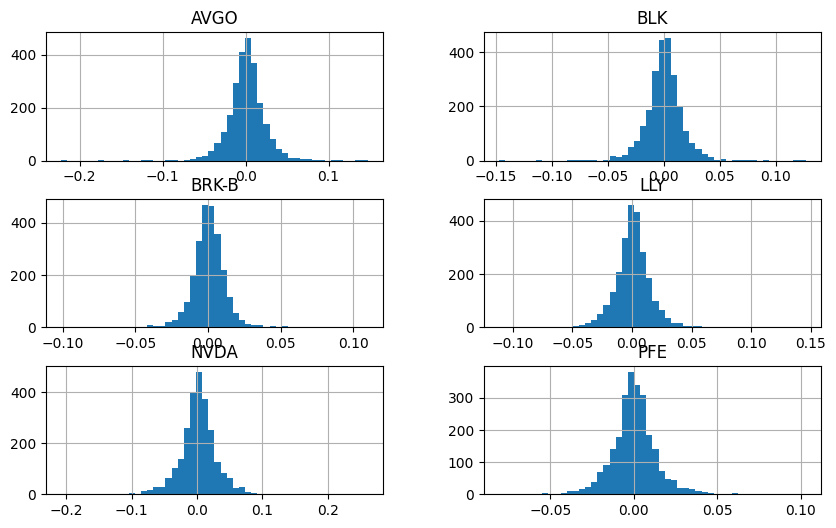

In [40]:
# grafico a istogramma dei rendimenti logaritmici
log_returns.hist(bins=50, figsize=(10, 6))
plt.show()

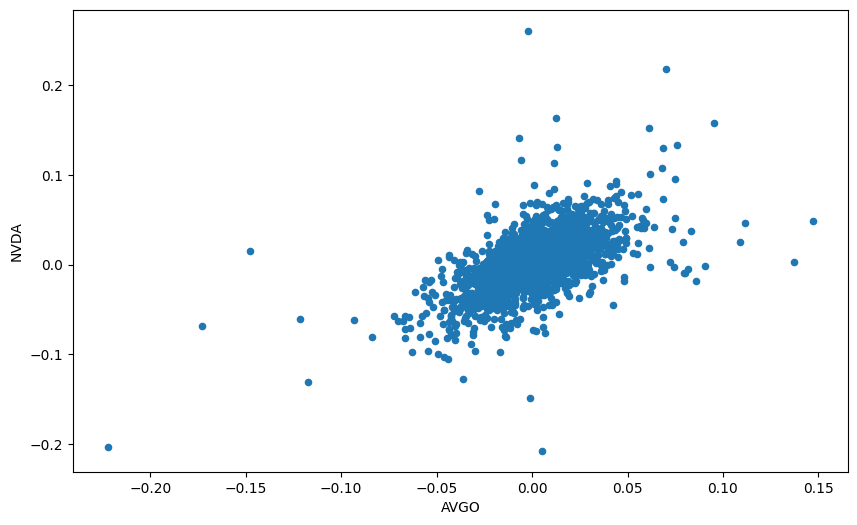

In [42]:
# grafico a dispersione dei rendimenti logaritmici dei titoli tecnologici (AAPL e MSFT)
log_returns.plot(kind='scatter', x='AVGO', y='NVDA', figsize=(10, 6))
plt.show()

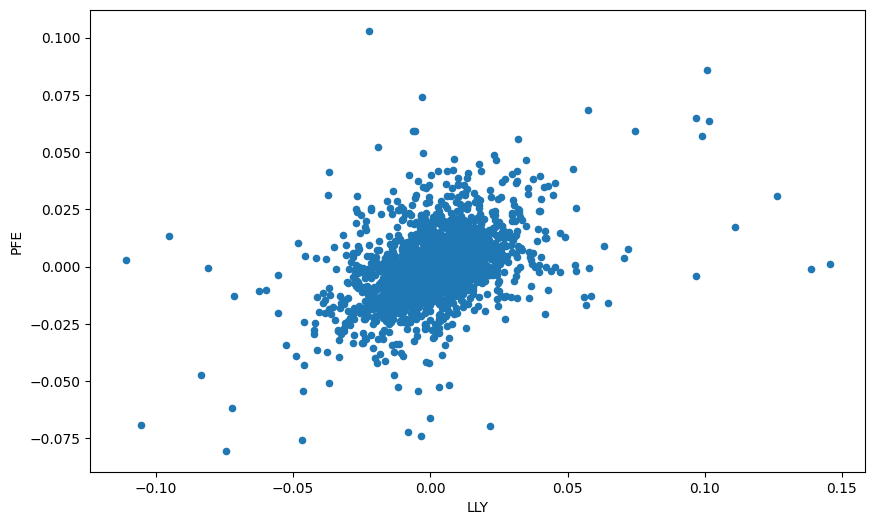

In [43]:
# grafico a dispersione dei rendimenti logaritmici dei titoli sanitari (JPM e BAC)
log_returns.plot(kind='scatter', x='LLY', y='PFE', figsize=(10, 6))
plt.show()

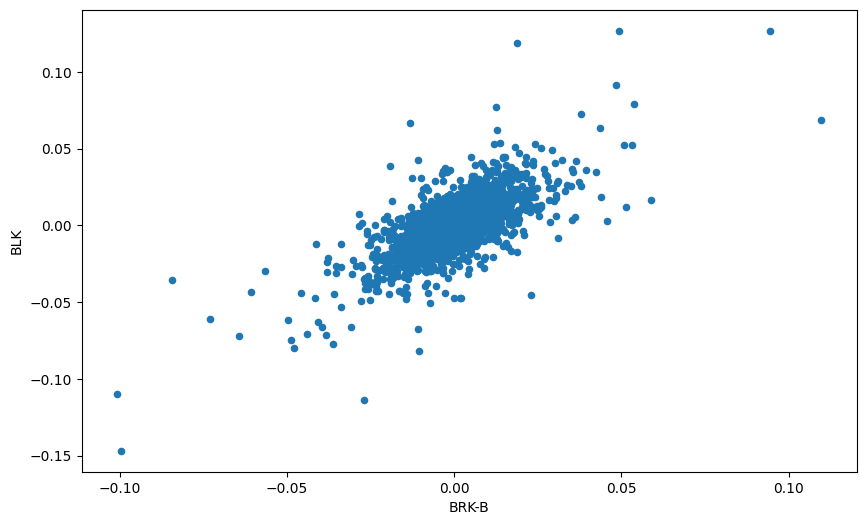

In [45]:
# grafico a dispersione dei rendimenti logaritmici dei titoli finanziari (XOM e CVX)
log_returns.plot(kind='scatter', x='BRK-B', y='BLK', figsize=(10, 6))
plt.show()

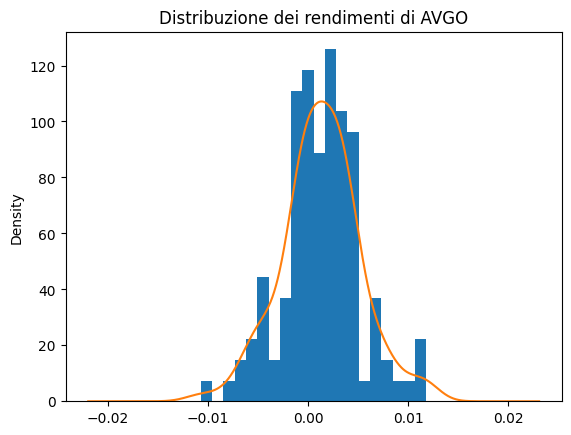

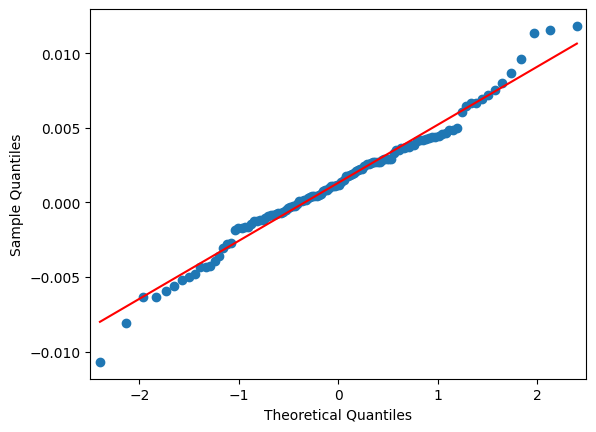

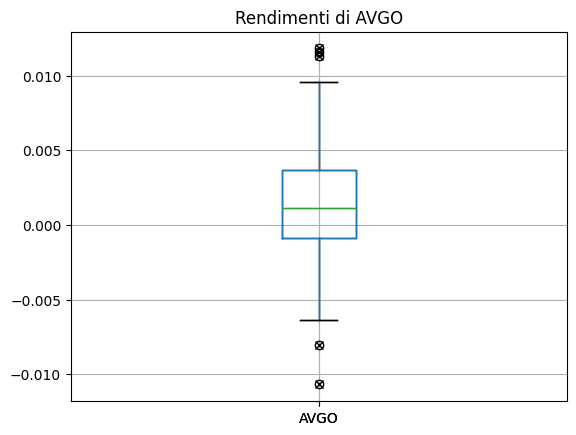

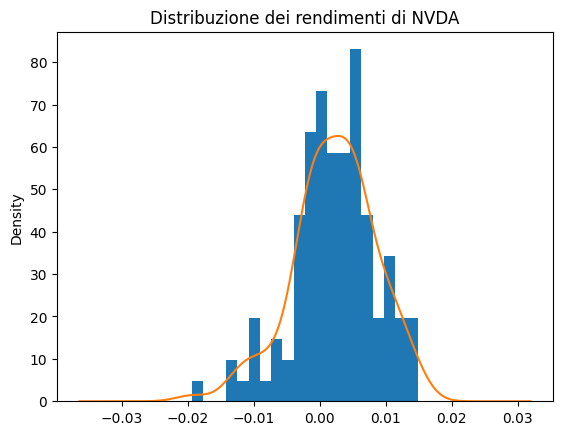

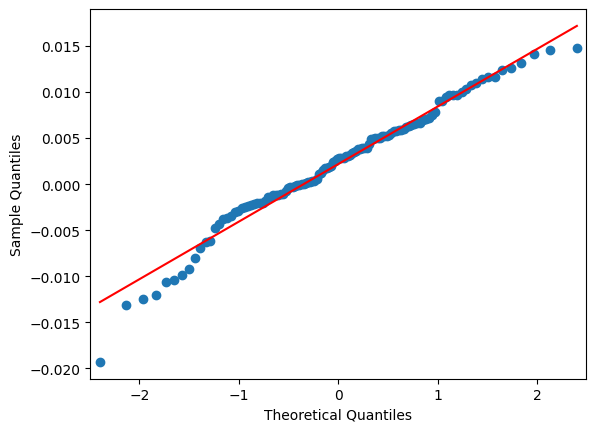

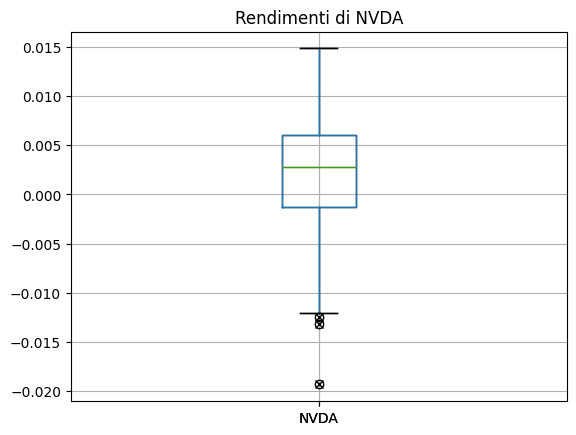

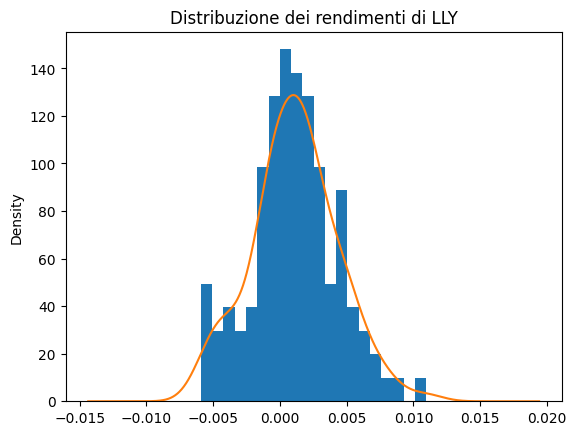

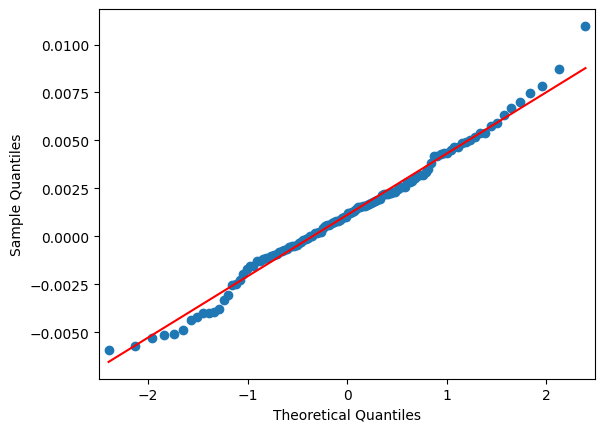

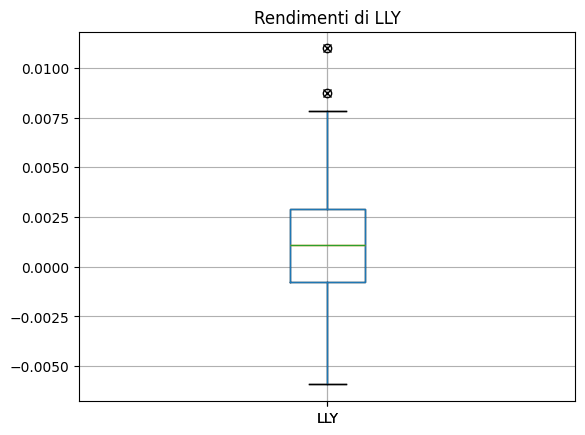

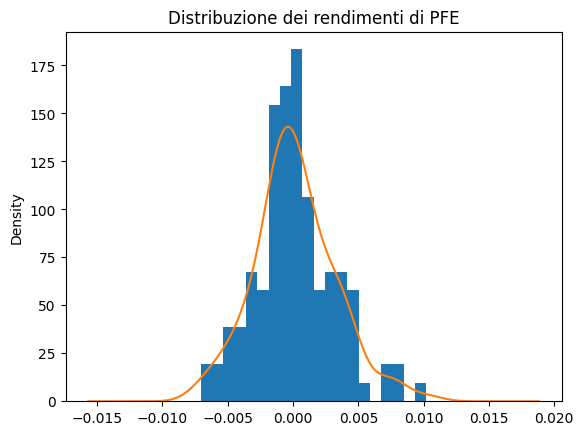

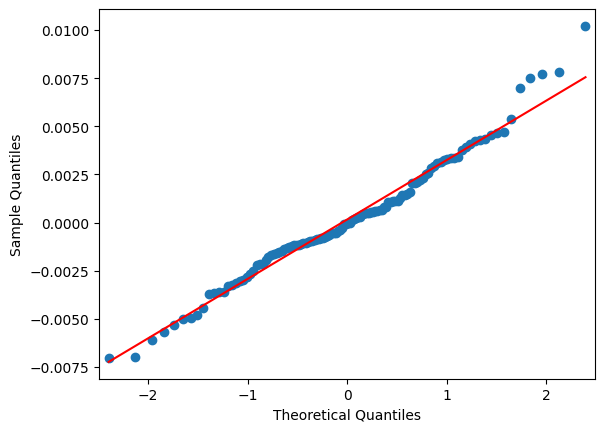

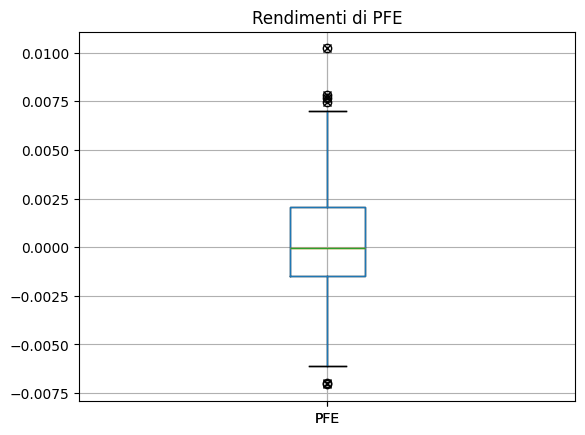

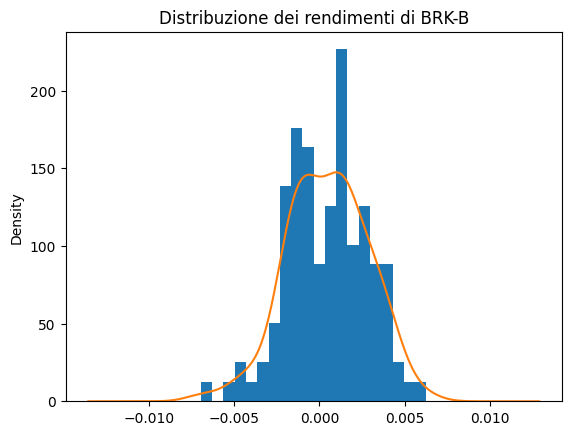

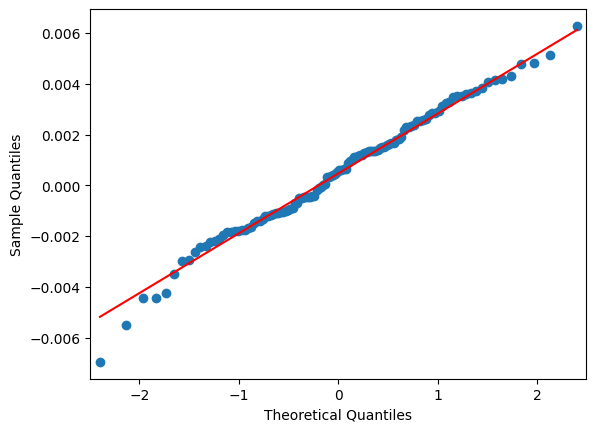

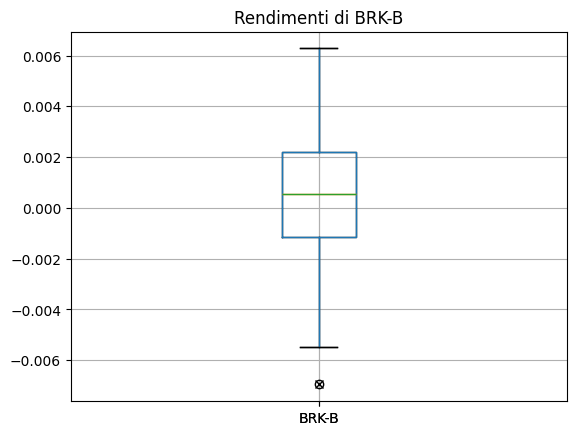

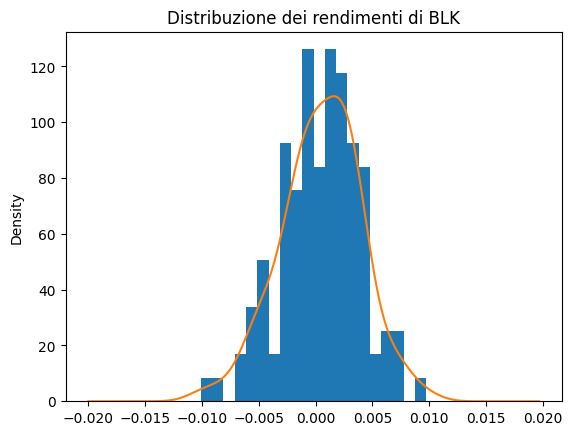

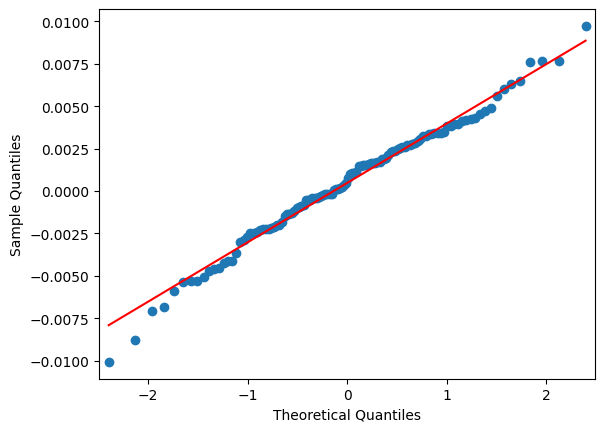

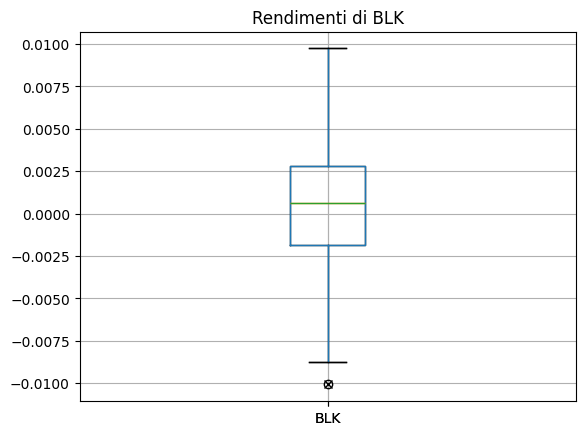

In [46]:
# grafico a densità dei rendimenti logaritmici per ogni titolo
for ticker in selected_stocks:
    plt.figure()
    plt.hist(log_returns_m[ticker], density = True, bins=20)
    plt.title('Distribuzione dei rendimenti di {}'.format(ticker))
    log_returns_m[ticker].plot.density()

    sm.qqplot(log_returns_m[ticker], line = 's')

    plt.figure()
    plt.boxplot(log_returns_m[ticker], sym = 'x')
    plt.title('Rendimenti di {}'.format(ticker))
    log_returns_m[ticker].to_frame().boxplot()

plt.show()

In [47]:
# Calcolare statistiche descrittive univariate (media, varianza, deviazione standard,asimmetria, curtosi) per ogni serie di rendimenti
for ticker in selected_stocks:
    # Media
    print(f"Ticker: {ticker}")
    print("Media:", round(log_returns[ticker].mean(), 4))
    # Varianza
    print("Varianza:", round(log_returns[ticker].var(), 4))
    # Deviazione standard
    print("Deviazione Standard:", round(log_returns[ticker].std(), 4))
    # Asimmetria
    print("Asimmetria:", round(log_returns[ticker].skew(), 4))
    # Curtosi
    print("Curtosi:", round(log_returns[ticker].kurtosis(), 4))
    print()

Ticker: AVGO
Media: 0.0013
Varianza: 0.0005
Deviazione Standard: 0.0222
Asimmetria: -0.4293
Curtosi: 9.3449

Ticker: NVDA
Media: 0.0022
Varianza: 0.0009
Deviazione Standard: 0.0295
Asimmetria: 0.247
Curtosi: 7.6664

Ticker: LLY
Media: 0.0011
Varianza: 0.0003
Deviazione Standard: 0.0169
Asimmetria: 0.7396
Curtosi: 10.7118

Ticker: PFE
Media: 0.0002
Varianza: 0.0002
Deviazione Standard: 0.0144
Asimmetria: 0.1501
Curtosi: 5.1367

Ticker: BRK-B
Media: 0.0005
Varianza: 0.0001
Deviazione Standard: 0.0121
Asimmetria: -0.2482
Curtosi: 11.2427

Ticker: BLK
Media: 0.0005
Varianza: 0.0003
Deviazione Standard: 0.0171
Asimmetria: -0.1618
Curtosi: 8.7483



In [48]:
# correlazione tra i rendimenti logaritmici dei titoli tecnologici (AAPL e MSFT)
tech_corr = log_returns['NVDA'].corr(log_returns['AVGO'])
print(tech_corr)

0.5959944179477924


In [49]:
# correlazione tra i rendimenti logaritmici dei titoli sanitari (JPM e BAC)
bank_corr = log_returns['PFE'].corr(log_returns['LLY'])
print(bank_corr)

0.4344676273130312


In [50]:
# correlazione tra i rendimenti logaritmici dei titoli finanziari (XOM e CVX)
energy_corr = log_returns['BLK'].corr(log_returns['BRK-B'])
print(energy_corr)

0.7065392108456261


In [51]:
# matrice di covarianza
cov_matrix = log_returns.cov()
cov_matrix

Ticker      AVGO       BLK     BRK-B       LLY      NVDA       PFE
Ticker                                                            
AVGO    0.000492  0.000207  0.000131  0.000095  0.000391  0.000082
BLK     0.000207  0.000294  0.000147  0.000094  0.000252  0.000099
BRK-B   0.000131  0.000147  0.000147  0.000076  0.000143  0.000081
LLY     0.000095  0.000094  0.000076  0.000286  0.000115  0.000105
NVDA    0.000391  0.000252  0.000143  0.000115  0.000873  0.000083
PFE     0.000082  0.000099  0.000081  0.000105  0.000083  0.000206

In [52]:
# matrice di correlazione
corr_matrix = log_returns.corr()
corr_matrix

Ticker      AVGO       BLK     BRK-B       LLY      NVDA       PFE
Ticker                                                            
AVGO    1.000000  0.543379  0.486273  0.251986  0.595994  0.256158
BLK     0.543379  1.000000  0.706539  0.325419  0.497016  0.403194
BRK-B   0.486273  0.706539  1.000000  0.368931  0.398111  0.463175
LLY     0.251986  0.325419  0.368931  1.000000  0.229663  0.434468
NVDA    0.595994  0.497016  0.398111  0.229663  1.000000  0.194716
PFE     0.256158  0.403194  0.463175  0.434468  0.194716  1.000000

In [56]:
# correlazione nel tempo per ogni settore
corr_over_time_tech = log_returns['NVDA'].rolling(window=90).corr(log_returns['AVGO'])
corr_over_time_healthcare = log_returns['PFE'].rolling(window=90).corr(log_returns['LLY'])
corr_over_time_bank = log_returns['BLK'].rolling(window=90).corr(log_returns['BRK-B'])

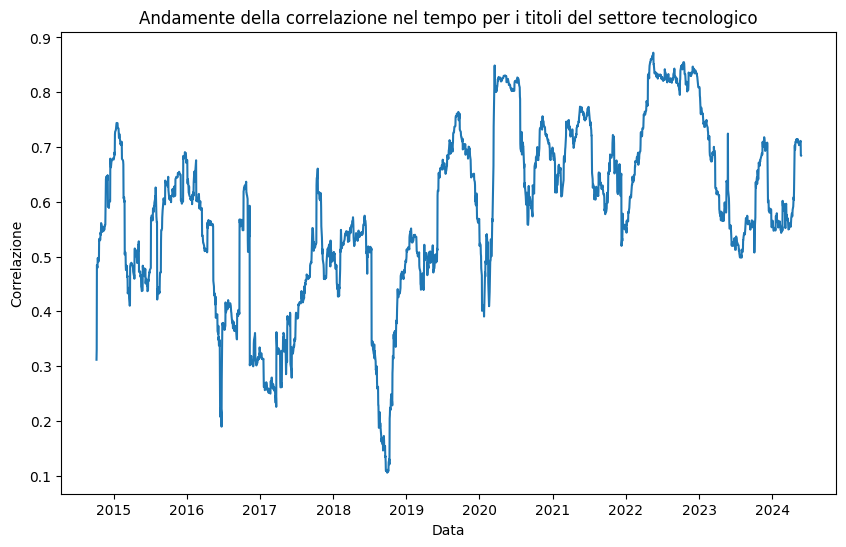

In [54]:
# grafico correlazione nel tempo per il settore tecnologico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(corr_over_time_tech.index, corr_over_time_tech)
ax.set_xlabel('Data')
ax.set_ylabel('Correlazione')
ax.set_title('Andamente della correlazione nel tempo per i titoli del settore tecnologico')
plt.show()

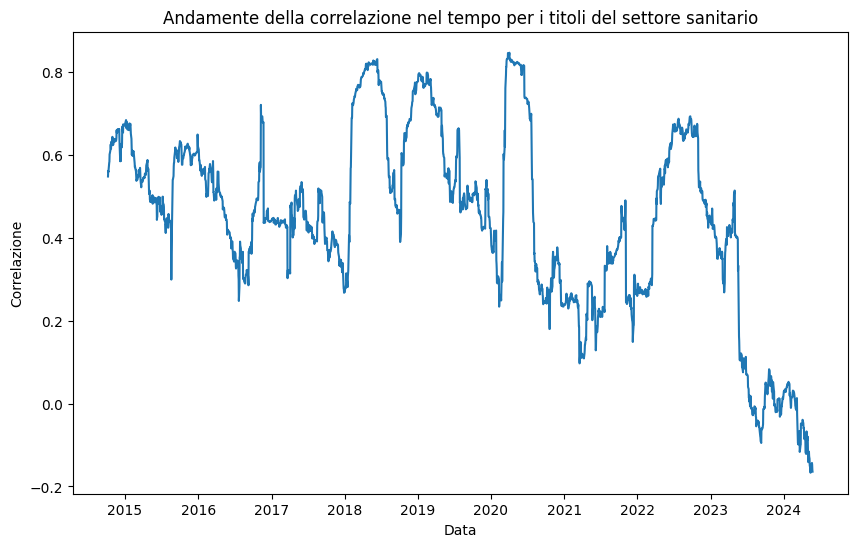

In [57]:
# grafico correlazione nel tempo per il settore sanitario
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(corr_over_time_healthcare.index, corr_over_time_healthcare)
ax.set_xlabel('Data')
ax.set_ylabel('Correlazione')
ax.set_title('Andamente della correlazione nel tempo per i titoli del settore sanitario')
plt.show()

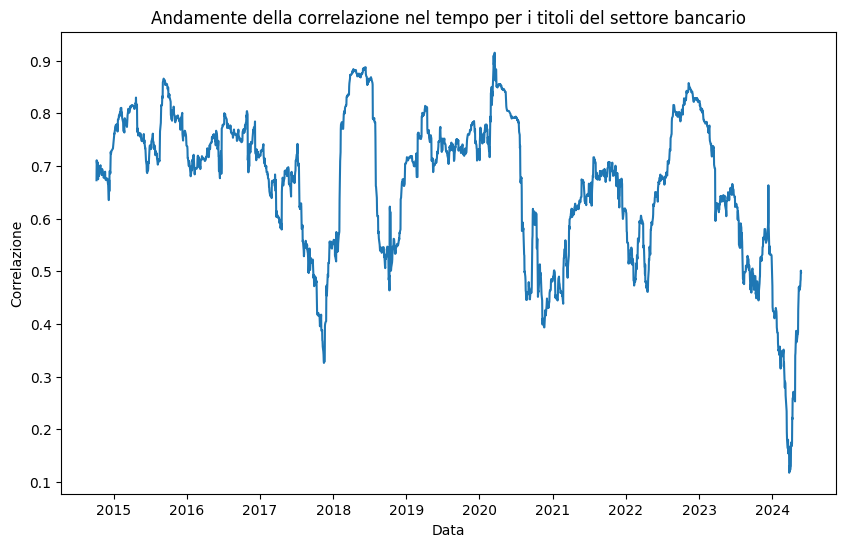

In [58]:
# grafico correlazione nel tempo per il settore bancario
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(corr_over_time_bank.index, corr_over_time_bank)
ax.set_xlabel('Data')
ax.set_ylabel('Correlazione')
ax.set_title('Andamente della correlazione nel tempo per i titoli del settore bancario')
plt.show()

In [59]:
# Calcolo delle correlazioni medie
mean_corr = corr_matrix.mean()

Text(0, 0.5, 'NVDA')

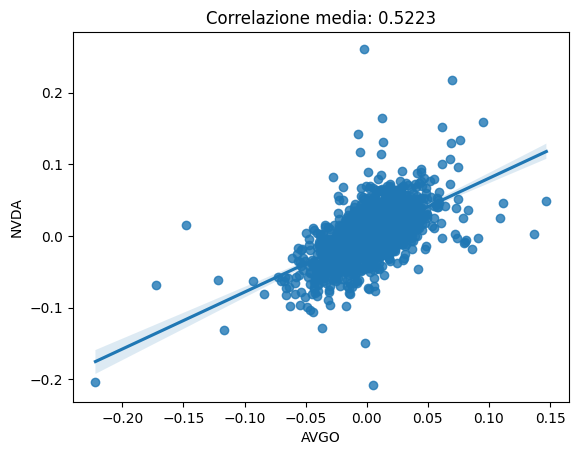

In [60]:
# Grafico di dispersione delle correlazioni medie tra AVGO e NVDA (titoli tecnologici)
plt.figure()
sns.regplot(x=log_returns['AVGO'], y=log_returns['NVDA'], data=log_returns)
plt.title("Correlazione media: " + str(round(mean_corr['AVGO'], 4)))
plt.xlabel('AVGO')
plt.ylabel('NVDA')

Text(0, 0.5, 'PFE')

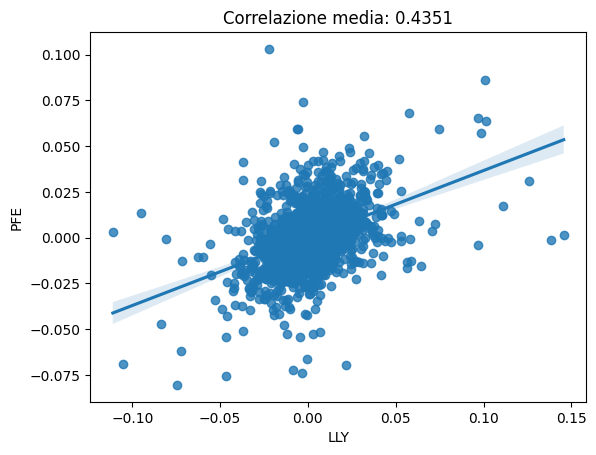

In [61]:
# Grafico di dispersione delle correlazioni medie tra LLY e PFE (titoli sanitari)
plt.figure()
sns.regplot(x=log_returns['LLY'], y=log_returns['PFE'], data=log_returns)
plt.title("Correlazione media: " + str(round(mean_corr['LLY'], 4)))
plt.xlabel('LLY')
plt.ylabel('PFE')

Text(0, 0.5, 'BLK')

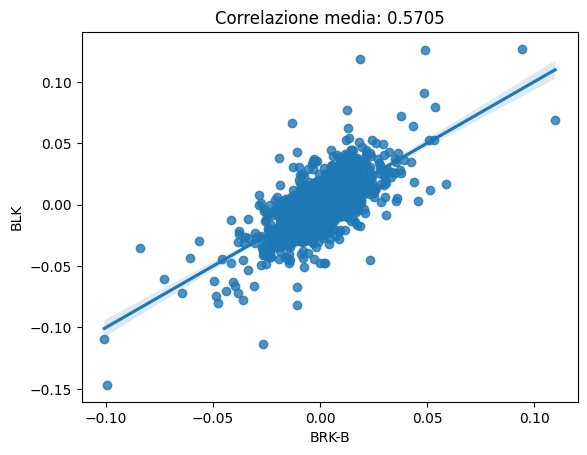

In [62]:
# Grafico di dispersione delle correlazioni medie tra BRK-B e BLK (titoli bancari)
plt.figure()
sns.regplot(x=log_returns['BRK-B'], y=log_returns['BLK'], data=log_returns)
plt.title("Correlazione media: " + str(round(mean_corr['BRK-B'], 4)))
plt.xlabel('BRK-B')
plt.ylabel('BLK')

In [64]:
future_days = 5
for ticker in selected_stocks:
    position = adj_close_data.columns.get_loc(ticker) + 1
    adj_close_data.insert(position, f"{ticker}_5_Days_Price_Forecast", adj_close_data[ticker].shift(-future_days))

adj_close_data.head(12)

Ticker           AVGO  AVGO_5_Days_Price_Forecast         BLK  \
Date                                                            
2014-06-02  54.481544                   54.595596  237.437515   
2014-06-03  54.337032                   54.648834  239.439194   
2014-06-04  54.458717                   54.565186  241.099655   
2014-06-05  54.656448                   54.572784  241.966095   
2014-06-06  54.473927                   54.314217  245.112488   
2014-06-09  54.595596                   53.903545  245.588715   
2014-06-10  54.648834                   54.583187  245.690155   
2014-06-11  54.565186                   54.384647  243.106018   
2014-06-12  54.572784                   54.163181  241.099625   
2014-06-13  54.314217                   54.651894  241.591431   
2014-06-16  53.903545                   54.399899  241.536774   
2014-06-17  54.583187                   53.964668  243.621277   

Ticker      BLK_5_Days_Price_Forecast       BRK-B  \
Date                                                
2014-06-02                 245.588715  127.879997   
2014-06-03                 245.690155  126.930000   
2014-06-04                 243.106018  127.230003   
2014-06-05                 241.099625  128.199997   
2014-06-06                 241.591431  128.649994   
2014-06-09                 241.536774  127.989998   
2014-06-10                 243.621277  128.250000   
2014-06-11                 249.710892  128.220001   
2014-06-12                 248.891129  127.279999   
2014-06-13                 248.305573  126.540001   
2014-06-16                 248.204117  126.150002   
2014-06-17                 246.908081  126.029999   

Ticker      BRK-B_5_Days_Price_Forecast        LLY  LLY_5_Days_Price_Forecast  \
Date                                                                            
2014-06-02                   127.989998  48.572342                  48.776466   
2014-06-03                   128.250000  48.458038                  48.784634   
2014-06-04                   128.220001  48.351906                  48.556015   
2014-06-05                   127.279999  48.645821                  48.074295   
2014-06-06                   126.540001  48.686653                  48.090614   
2014-06-09                   126.150002  48.776466                  48.033474   
2014-06-10                   126.029999  48.784634                  48.376389   
2014-06-11                   127.169998  48.556015                  48.980595   
2014-06-12                   127.250000  48.074295                  48.866276   
2014-06-13                   126.739998  48.090614                  50.646214   
2014-06-16                   126.669998  48.033474                  50.678875   
2014-06-17                   126.779999  48.376389                  50.531902   

Ticker          NVDA  NVDA_5_Days_Price_Forecast        PFE  \
Date                                                          
2014-06-02  4.507795                    4.533975  19.234701   
2014-06-03  4.488755                    4.557776  19.157009   
2014-06-04  4.493514                    4.617276  19.189381   
2014-06-05  4.512554                    4.645836  19.267071   
2014-06-06  4.529215                    4.650599  19.046944   
2014-06-09  4.533975                    4.636317  19.001633   
2014-06-10  4.557776                    4.667259  19.098743   
2014-06-11  4.617276                    4.662498  19.053421   
2014-06-12  4.645836                    4.555395  19.066374   
2014-06-13  4.650599                    4.505414  19.118160   
2014-06-16  4.636317                    4.453055  19.169958   
2014-06-17  4.667259                    4.384032  19.085793   

Ticker      PFE_5_Days_Price_Forecast  
Date                                   
2014-06-02                  19.001633  
2014-06-03                  19.098743  
2014-06-04                  19.053421  
2014-06-05                  19.066374  
2014-06-06                  19.118160  
2014-06-09                  19.169958  
2014-06-

In [65]:
# dividi il dataset in tanti dataset quanti sono i titoli
adj_close_tickers = [adj_close_data[[ticker, f"{ticker}_5_Days_Price_Forecast"]] for ticker in selected_stocks]
adj_close_tickers

[Ticker             AVGO  AVGO_5_Days_Price_Forecast
 Date                                               
 2014-06-02    54.481544                   54.595596
 2014-06-03    54.337032                   54.648834
 2014-06-04    54.458717                   54.565186
 2014-06-05    54.656448                   54.572784
 2014-06-06    54.473927                   54.314217
 ...                 ...                         ...
 2024-05-20  1414.030029                         NaN
 2024-05-21  1399.199951                         NaN
 2024-05-22  1392.239990                         NaN
 2024-05-23  1393.290039                         NaN
 2024-05-24  1407.839966                         NaN
 
 [2514 rows x 2 columns],
 Ticker             NVDA  NVDA_5_Days_Price_Forecast
 Date                                               
 2014-06-02     4.507795                    4.533975
 2014-06-03     4.488755                    4.557776
 2014-06-04     4.493514                    4.617276
 2014-06-05     4.

In [66]:
adj_close_tickers[0].shape

(2514, 2)

[*********************100%%**********************]  6 of 6 completed


svm_model confidence score is:  0.9293875613491109
Mean Absolute Error: 17.098107334790537
Mean Squared Error: 468.4872669677728
R2 Score: 0.902008300493047
0.9293875613491109


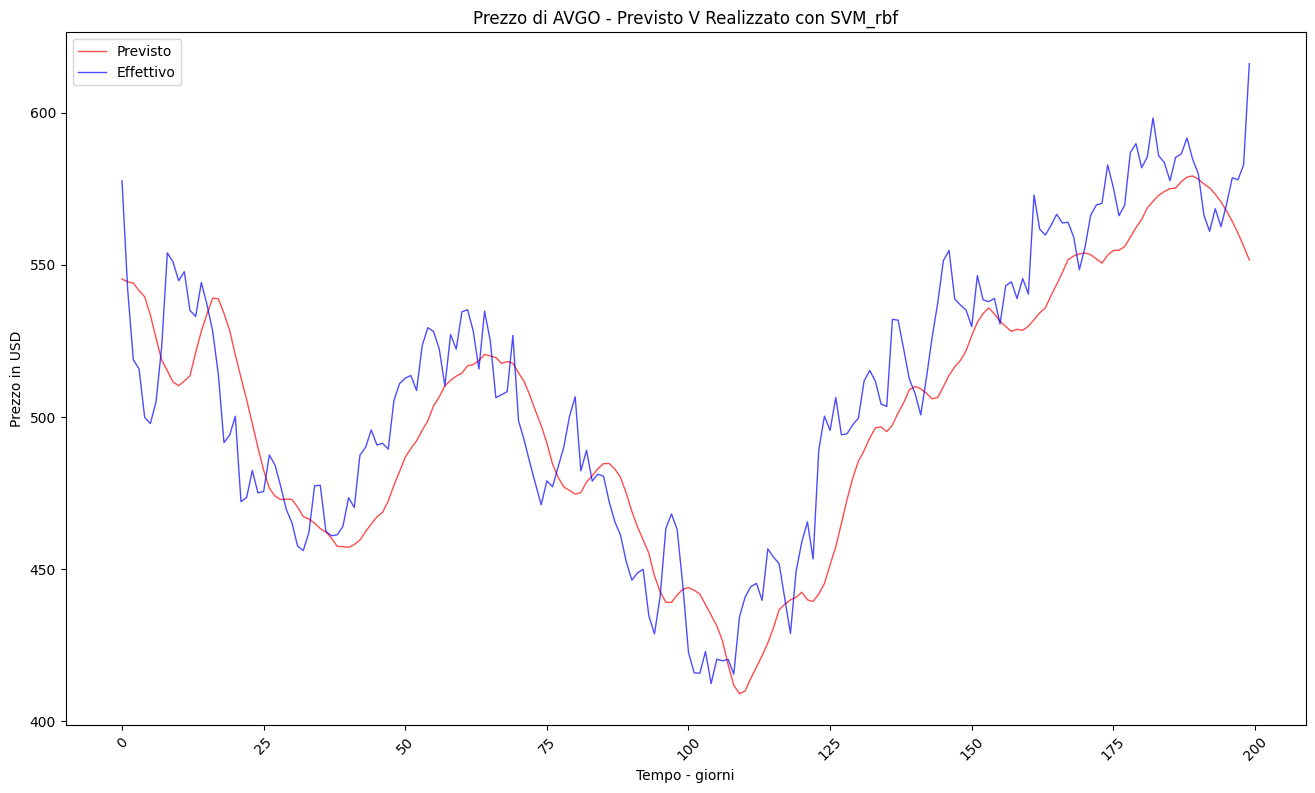

svm_model confidence score is:  0.9450046412725815
Mean Absolute Error: 10.697223829176284
Mean Squared Error: 204.2692137574816
R2 Score: 0.924214454488137
0.9450046412725815


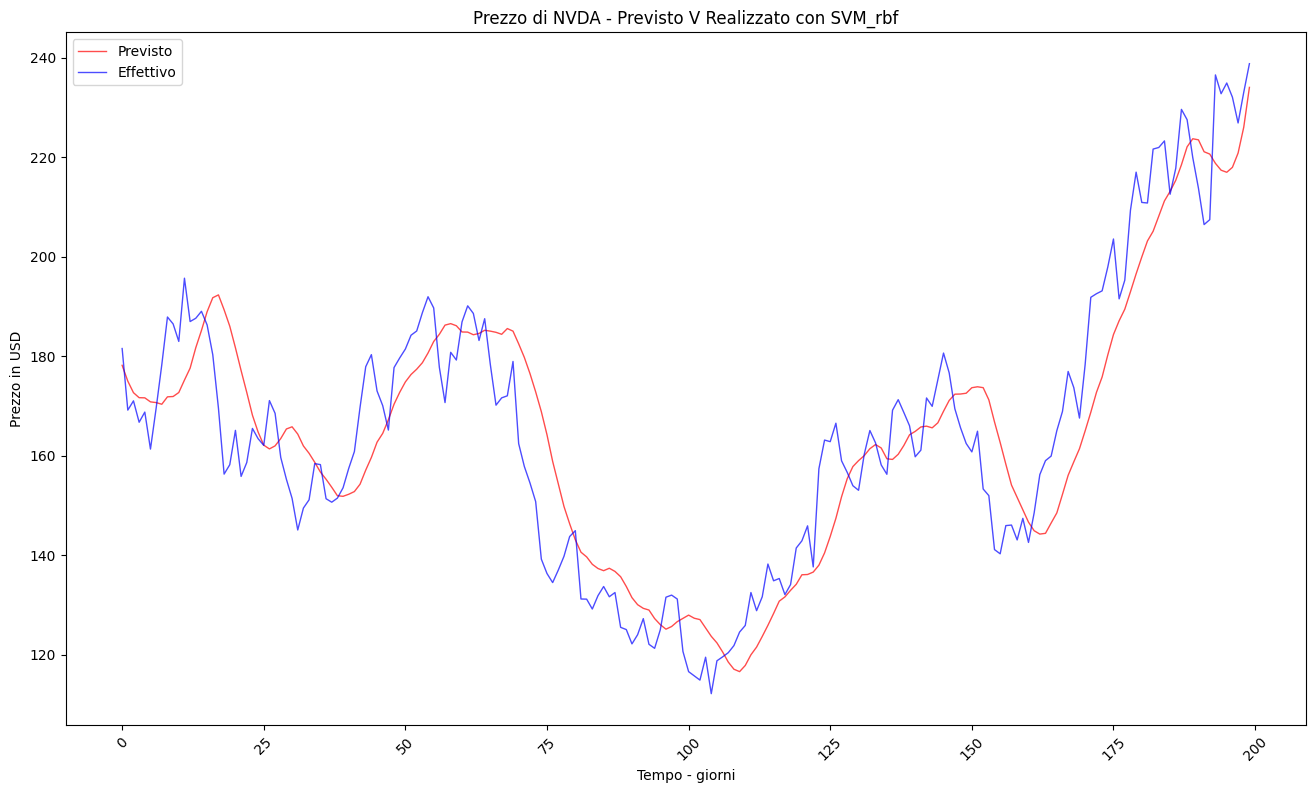

svm_model confidence score is:  0.9203193727761461
Mean Absolute Error: 8.295283955643614
Mean Squared Error: 115.49991807524539
R2 Score: 0.9720332725932963
0.9203193727761461


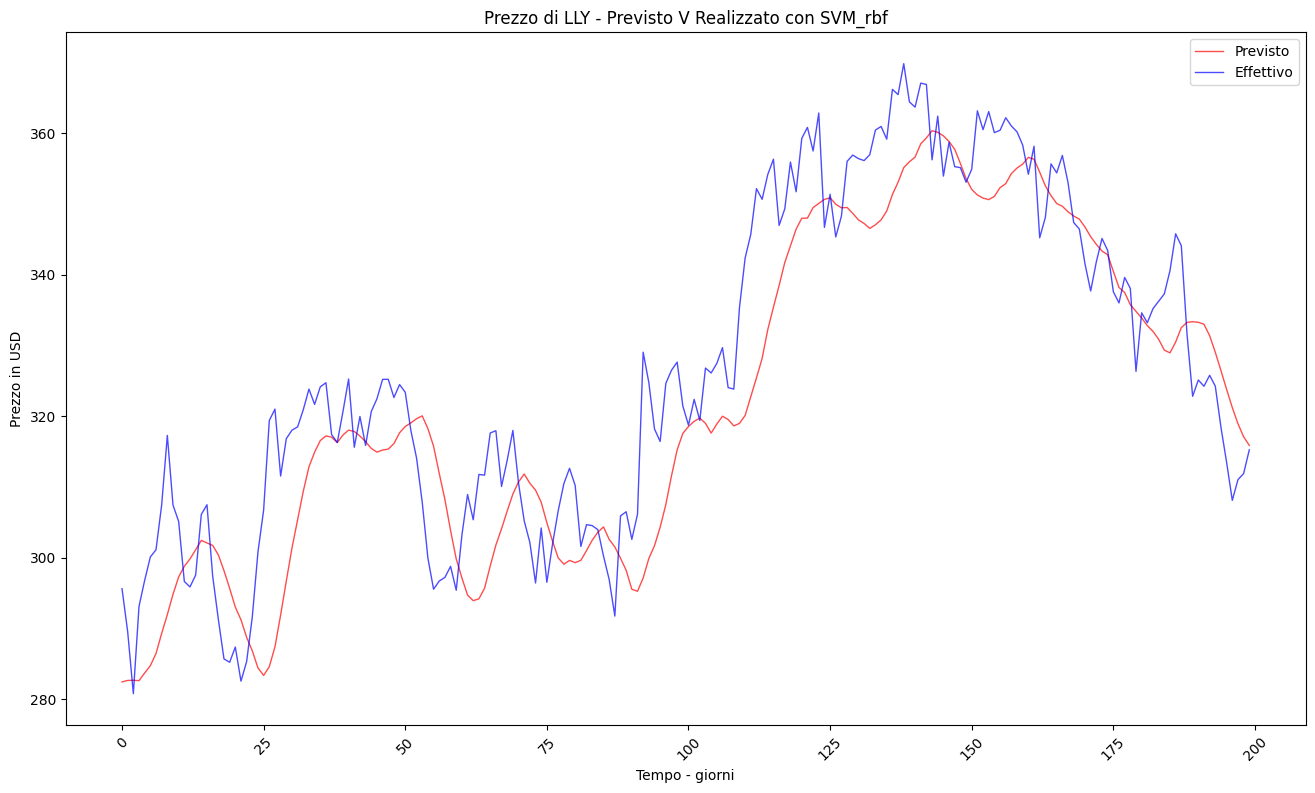

svm_model confidence score is:  0.9455091260106447
Mean Absolute Error: 1.234390018560257
Mean Squared Error: 2.751812715132382
R2 Score: 0.9334176039831091
0.9455091260106447


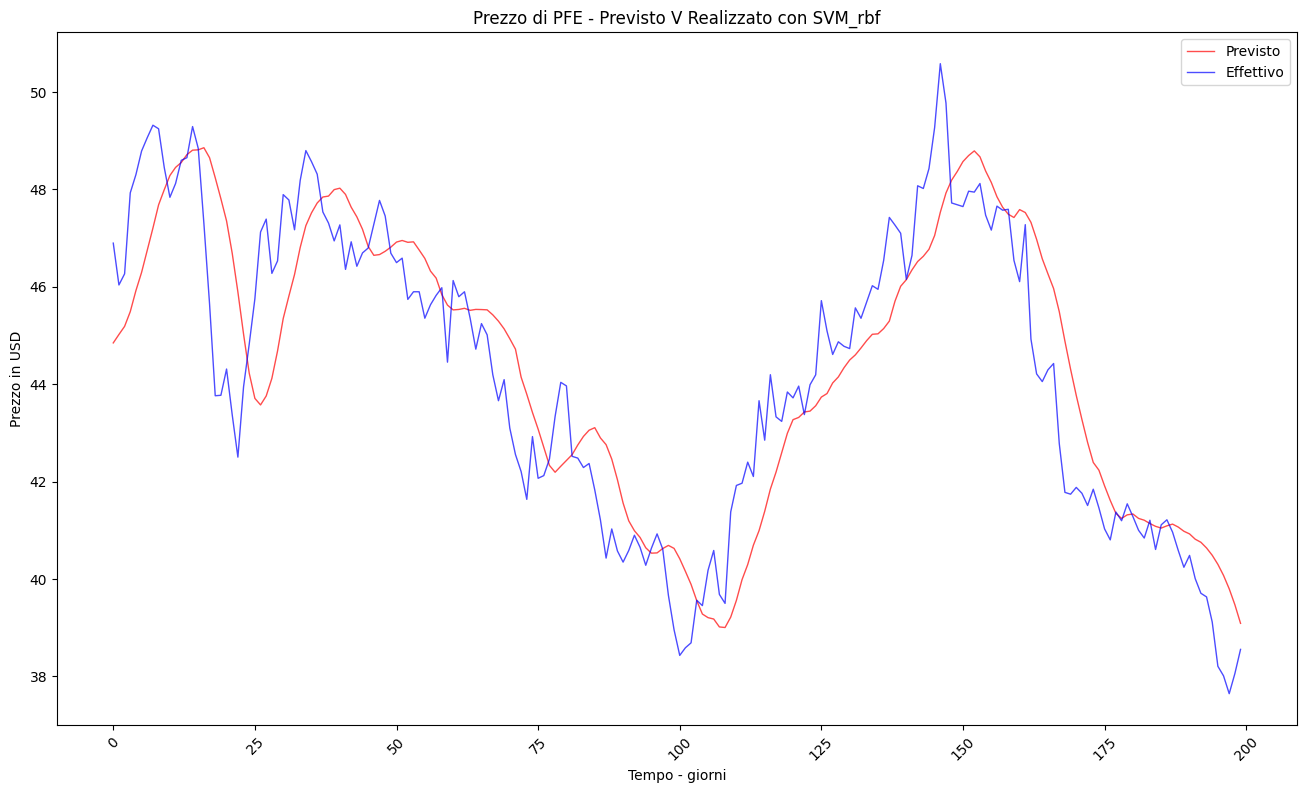

svm_model confidence score is:  0.940935559610834
Mean Absolute Error: 6.057625538634839
Mean Squared Error: 63.76416645169634
R2 Score: 0.9372949005767744
0.940935559610834


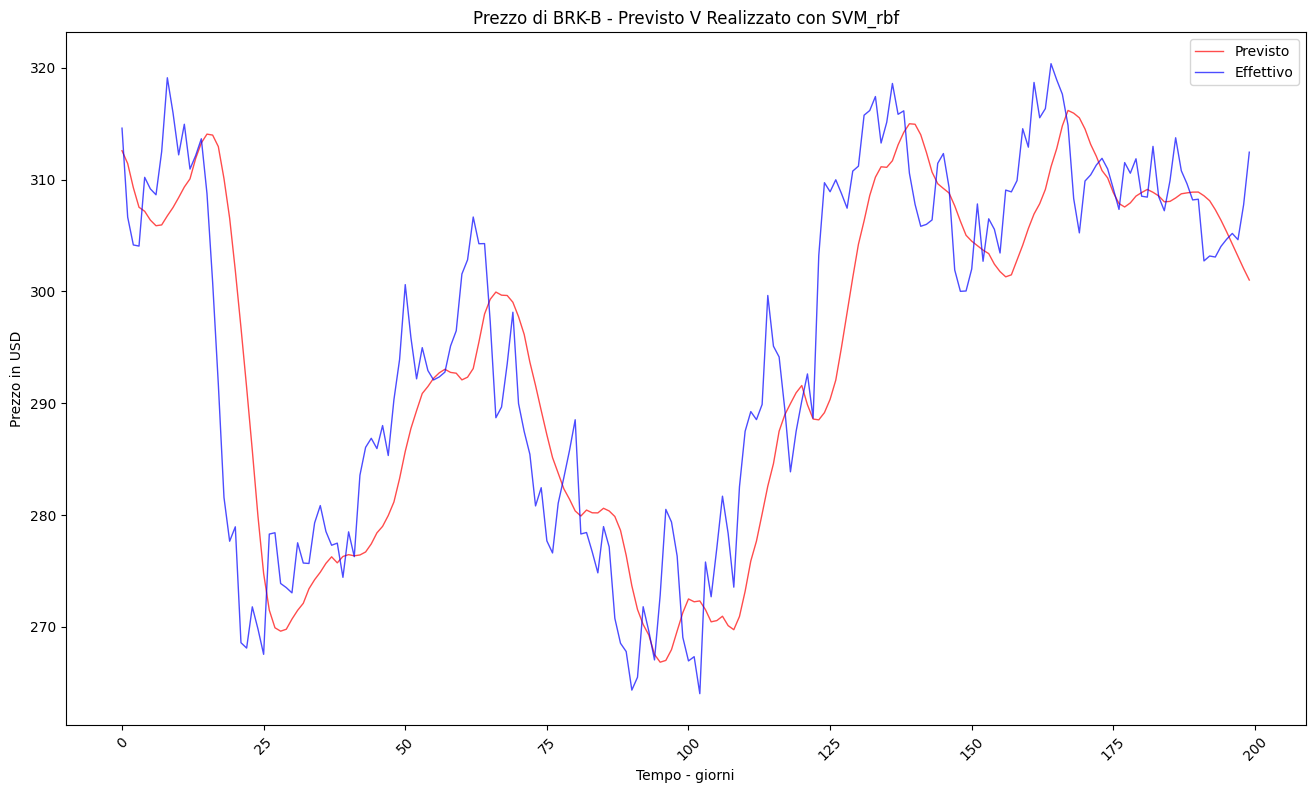

svm_model confidence score is:  0.8634874680324043
Mean Absolute Error: 24.537341031579736
Mean Squared Error: 937.5112192064756
R2 Score: 0.8991337503835636
0.8634874680324043


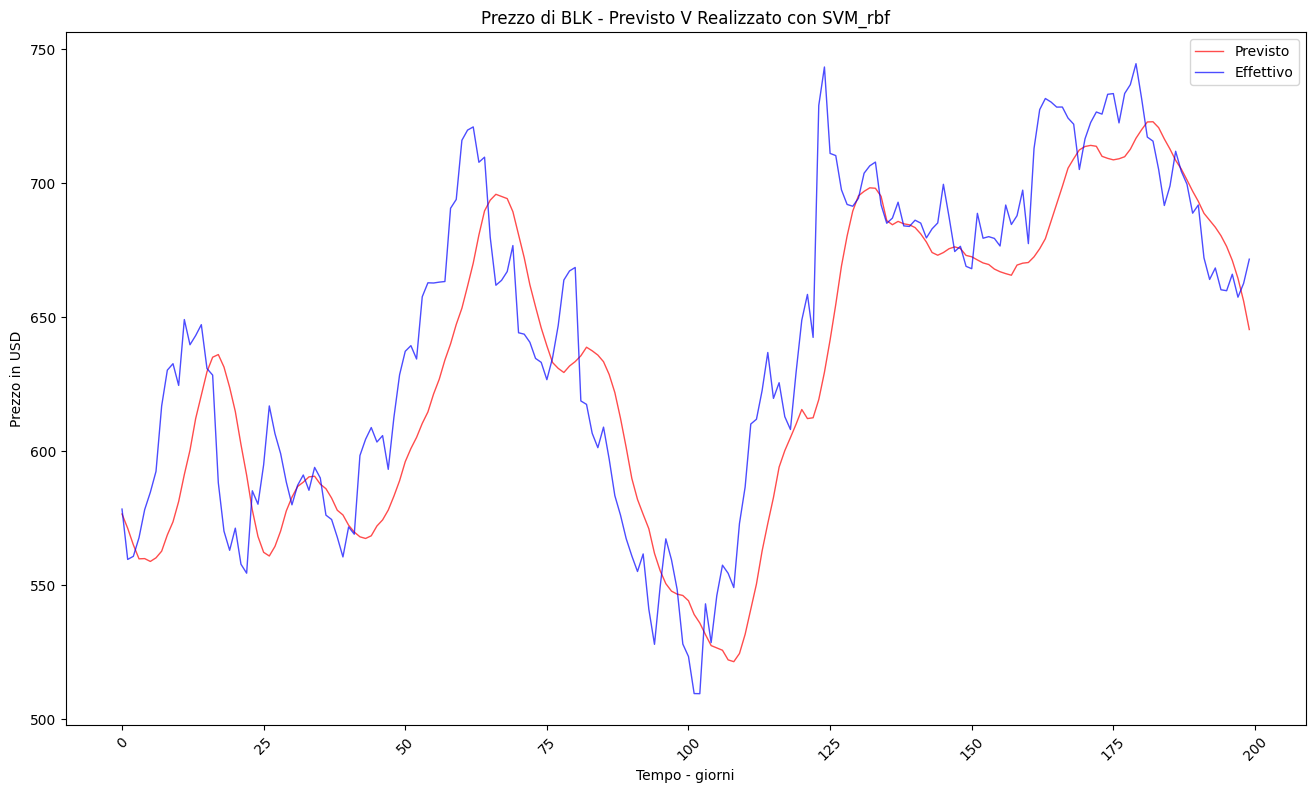

In [68]:
# analisi e grafico per ogni titolo del dataset
start_date_to_pred = '2022-6-30'
end_date_to_pred = '2023-4-30'
tickers_to_pred = ["AVGO","NVDA","LLY","PFE","BRK-B","BLK"]
data_to_pred = yf.download(tickers_to_pred, start=start_date_to_pred, end=end_date_to_pred)

for df in adj_close_tickers:

    X = np.array(df.iloc[:, 0])
    X = X[:df.shape[0] - future_days]
    X = np.reshape(X, (-1, 1))
    
    y = np.array(df.iloc[:, 1])
    y = y[:-future_days]    

    # uso 80 mesi per il training set
    X_train = X[:1600]
    y_train = y[:1600]

    # uso 30 mesi per il validation set
    X_val = X[1600:2200]
    y_val = y[1600:2200]

    # uso 10 mesi per il test set
    X_test = X[2200:]
    y_test = y[2200:]

    # standardizzazione dei dati
    scaler = StandardScaler()
    # fit scaler su training set
    scaler.fit(X_train)
    # trasforma il training set
    X_train = scaler.transform(X_train)
    # trasforma il validation set
    X_val = scaler.transform(X_val)
    # trasforma il test set
    X_test = scaler.transform(X_test)

    svm_model = SVR(kernel='rbf', C = 1e3, gamma = 0.0001)
    svm_model.fit(X_train, y_train)

    svm_model_confidence = svm_model.score(X_test, y_test)
    print('svm_model confidence score is: ', svm_model_confidence)

    svm_prediction = svm_model.predict(X_test)
    svm_prediction_smooth = savgol_filter(svm_prediction, 15, 3)

    svm_prediction_val = svm_model.predict(X_val)
    svm_prediction_val_smooth = savgol_filter(svm_prediction_val, 15, 3)

    mae = mean_absolute_error(y_val, svm_prediction_val)
    mse = mean_squared_error(y_val, svm_prediction_val)
    r2 = r2_score(y_val, svm_prediction_val)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print(svm_model.score(X_test, y_test))

    plt.figure(figsize=(16,9))
    plt.plot(svm_prediction_val_smooth[400:], label = 'Previsto', linewidth = '1', color ='r', alpha = .7)
    plt.plot(y_val[400:], label = 'Effettivo', linewidth = '1', color ='b', alpha = .7)
    plt.title('Prezzo di ' f"{df.columns[0]}" ' - Previsto V Realizzato con SVM_rbf')
    plt.ylabel('Prezzo in USD')
    plt.xlabel('Tempo - giorni')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
# stile dei grafici
style.use('ggplot')

In [69]:
# per ogni ticker creo un df
start_date = '2012-11-30'
end_date = '2022-11-30'
tickers = ["AVGO","NVDA","LLY","PFE","BRK-B","BLK"]
dfs = {}
for ticker in tickers:
    df_name = "df_" + ticker
    ticker_data = yf.download(ticker, start=start_date, end=end_date)
    dfs[df_name] = ticker_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [70]:
for ticker in tickers:
    dfs["df_" + ticker] = dfs["df_" + ticker].drop(columns = ['High', 'Low', 'Open', 'Close'])

In [71]:
# creazione delle due serie mobili
for ticker in tickers:
    dfs["df_" + ticker]['SMA20'] = dfs["df_" + ticker]['Adj Close'].rolling(20).mean()
    dfs["df_" + ticker]['SMA120'] = dfs["df_" + ticker]['Adj Close'].rolling(120).mean()

C:\Users\Alessandro Zanotti\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Alessandro Zanotti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


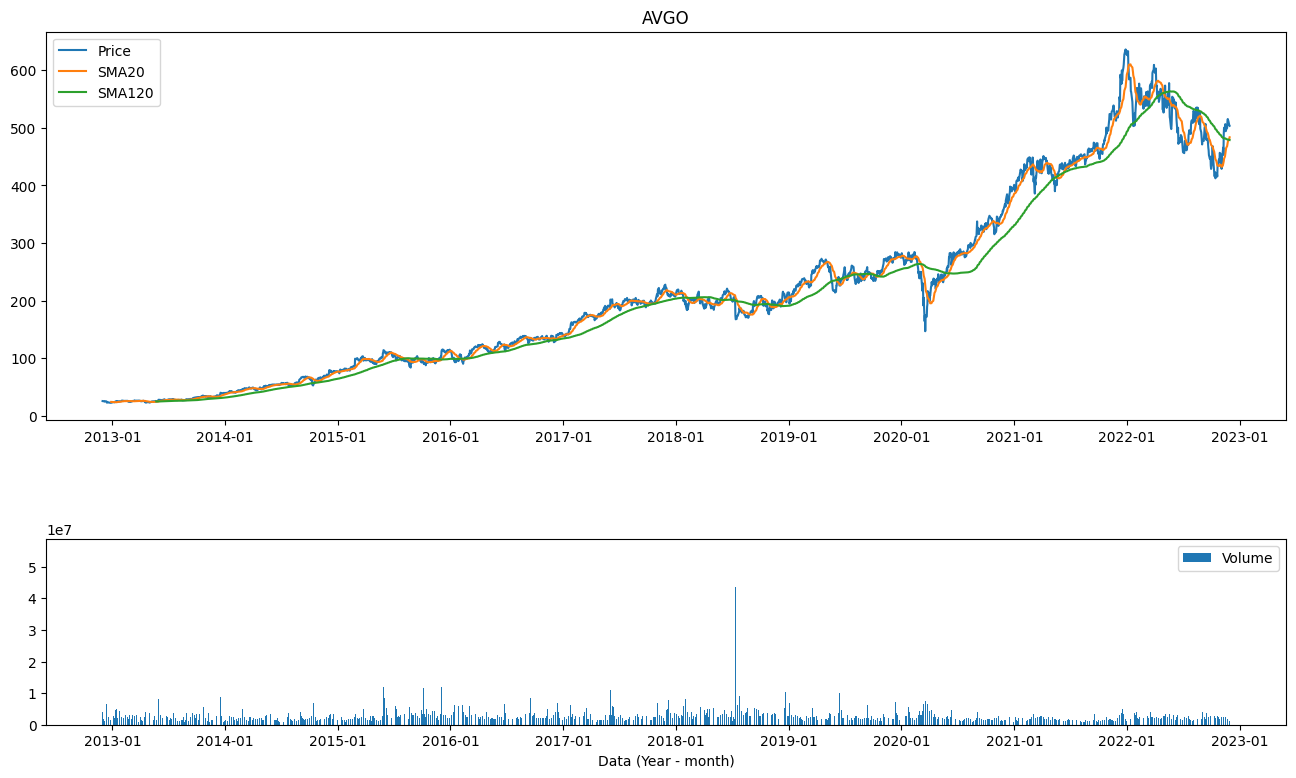

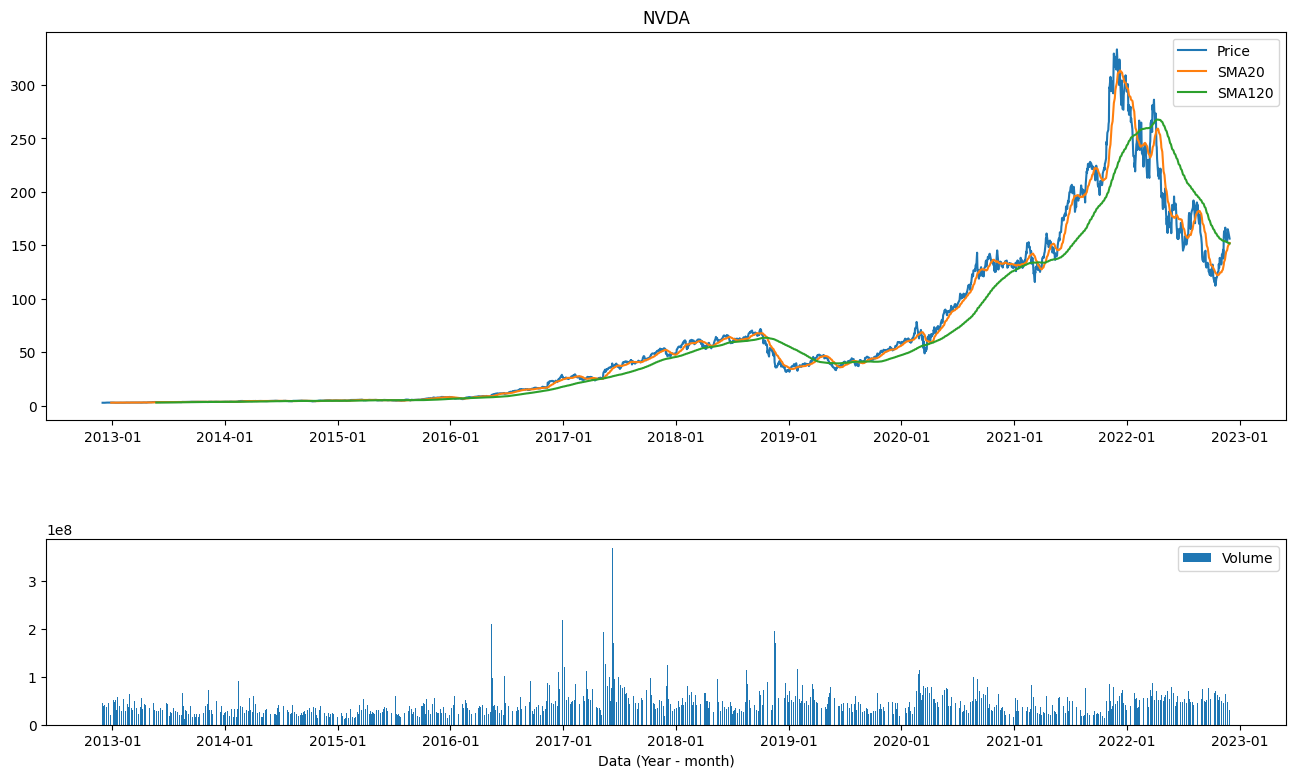

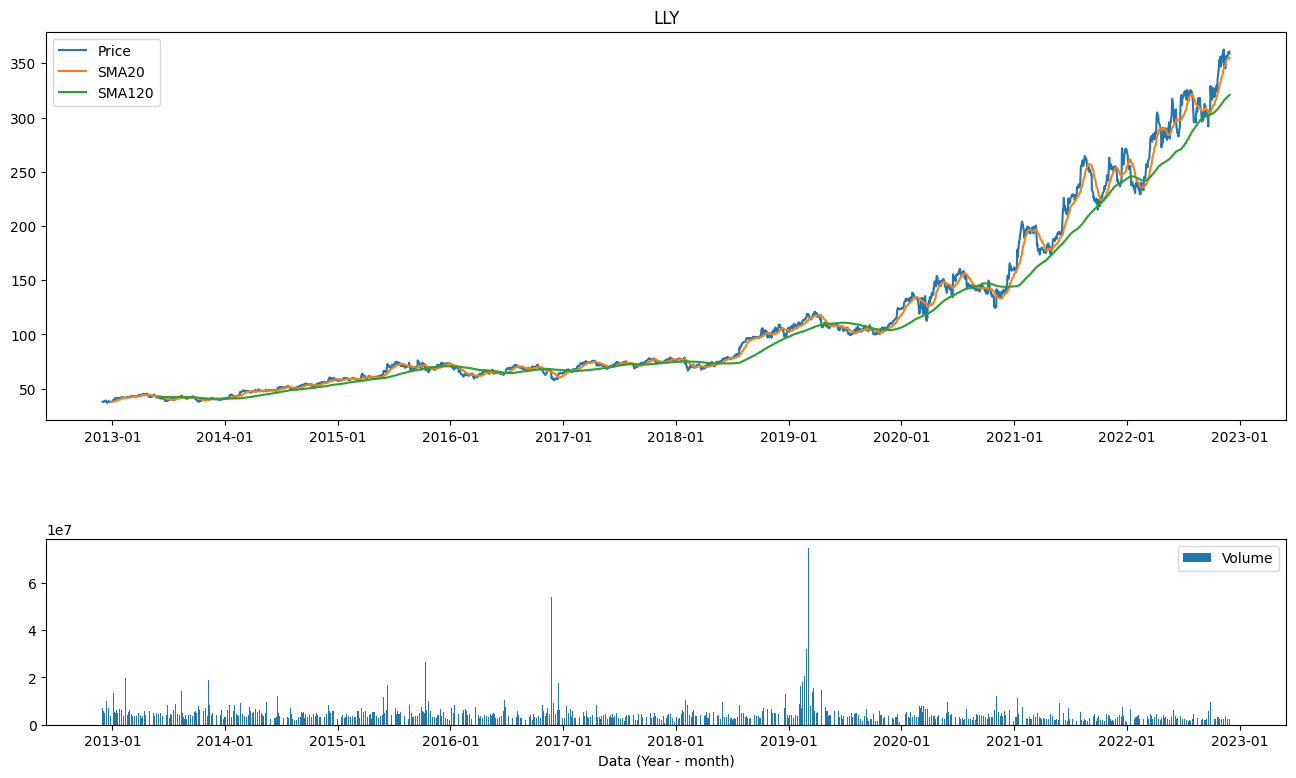

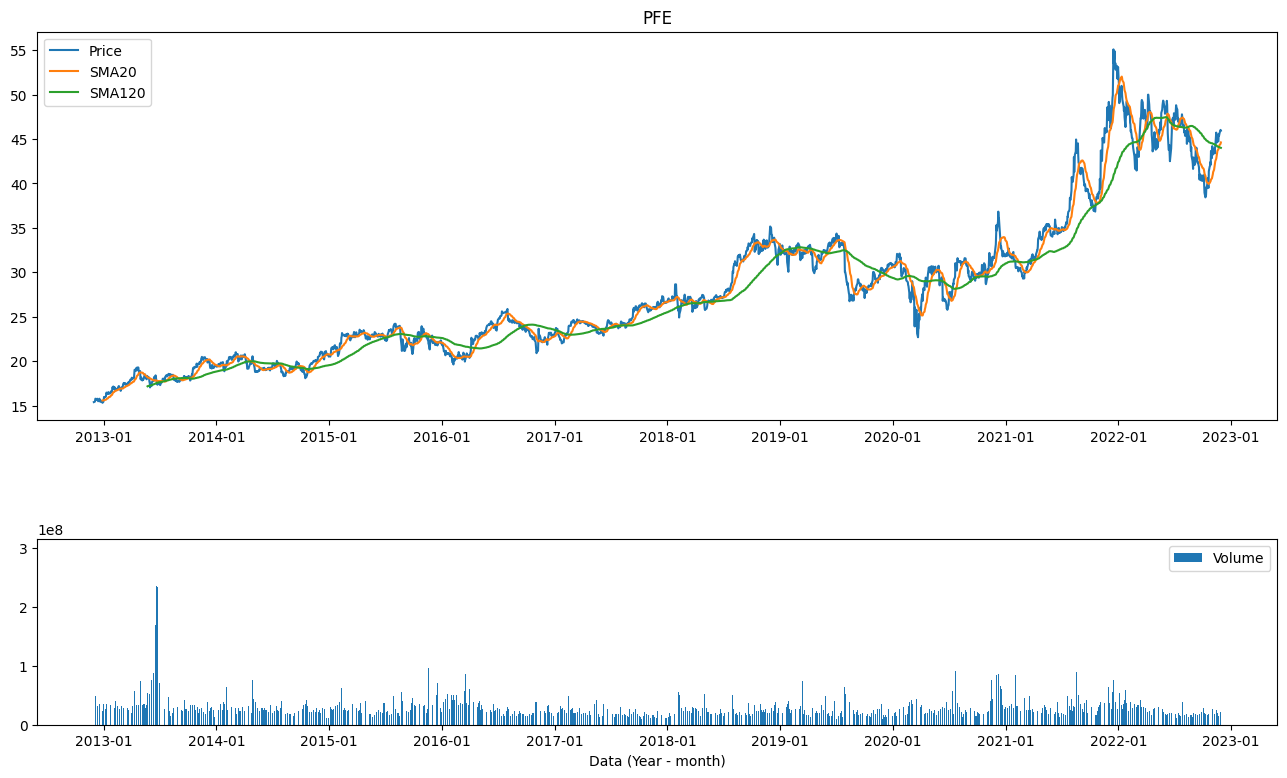

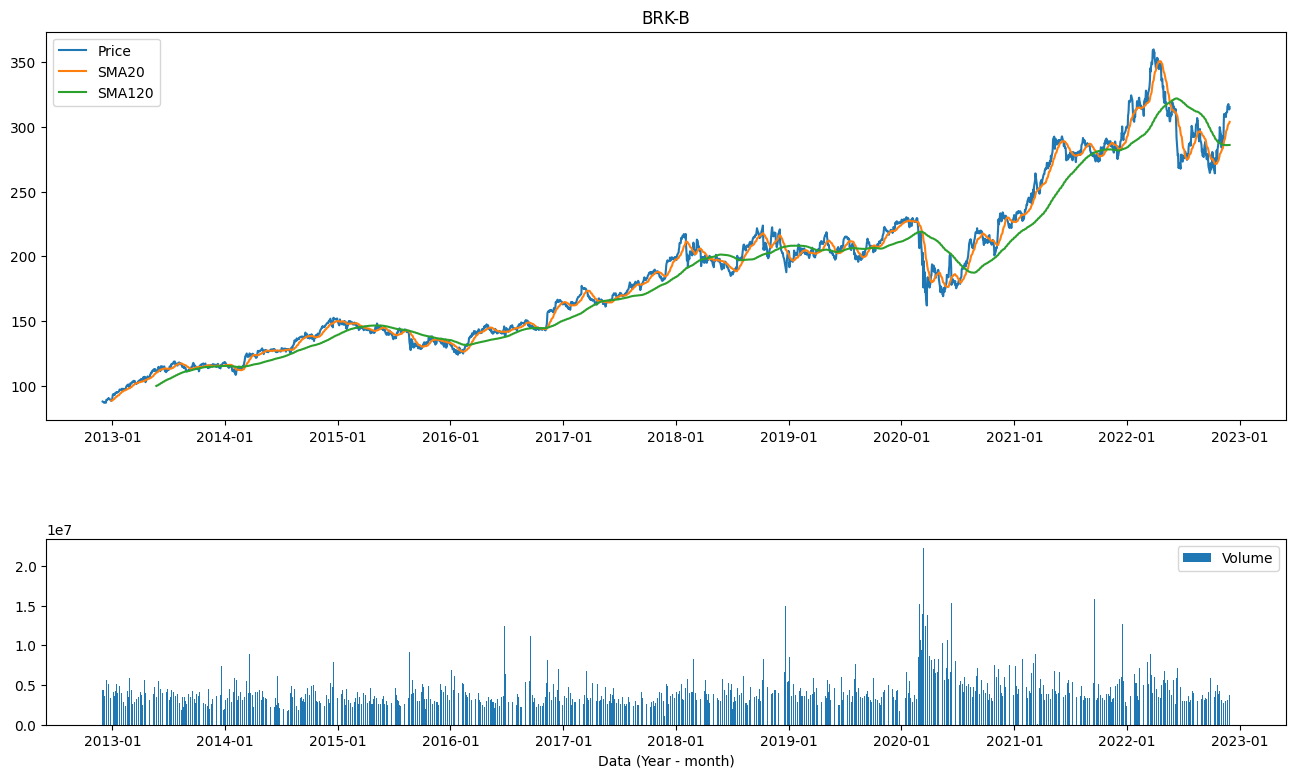

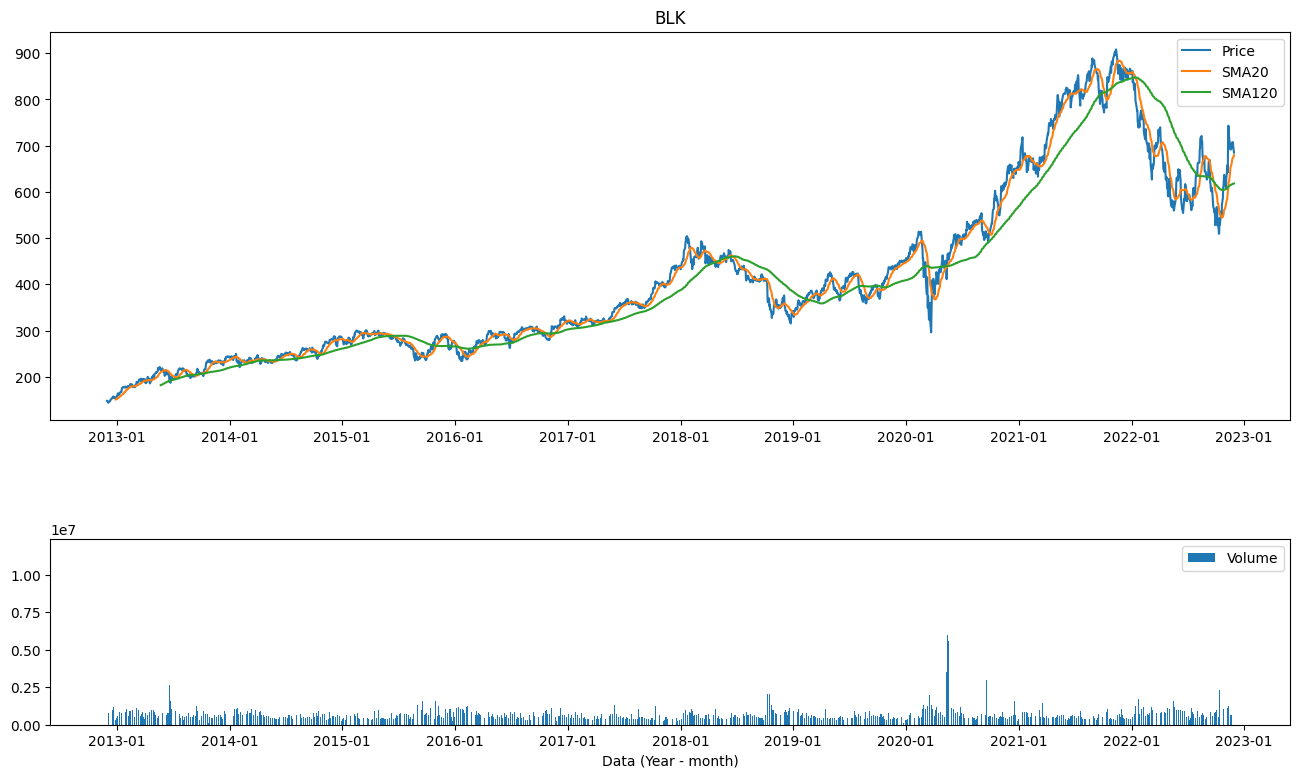

In [72]:
for ticker in tickers:
    df_name = "df_" + ticker
    df = dfs[df_name]

    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
    ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax1.plot(df['Adj Close'], label = 'Price')
    ax1.plot(df['SMA20'], label = 'SMA20')
    ax1.plot(df['SMA120'], label = 'SMA120')

    ax2.bar(df.index, df['Volume'], label = 'Volume')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.set_xlabel('Data (Year - month)')
    ax1.legend()
    ax2.legend()

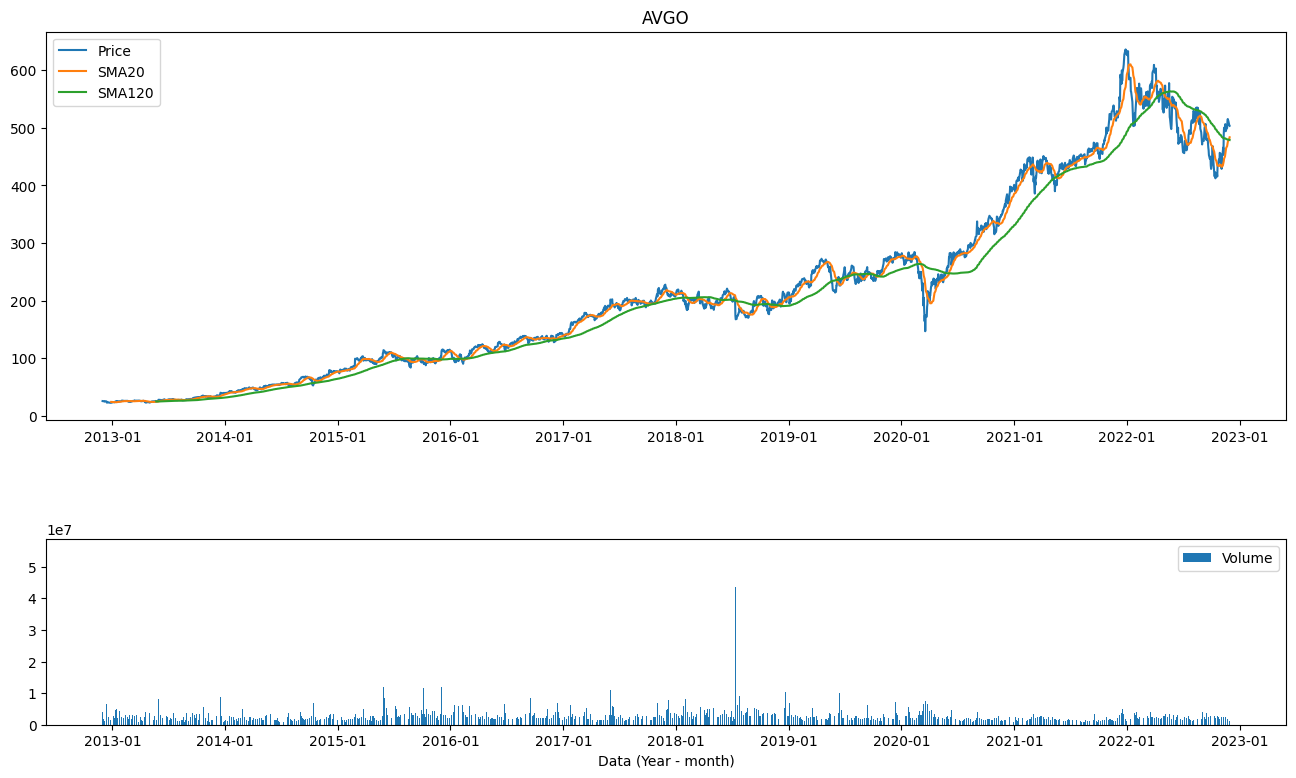

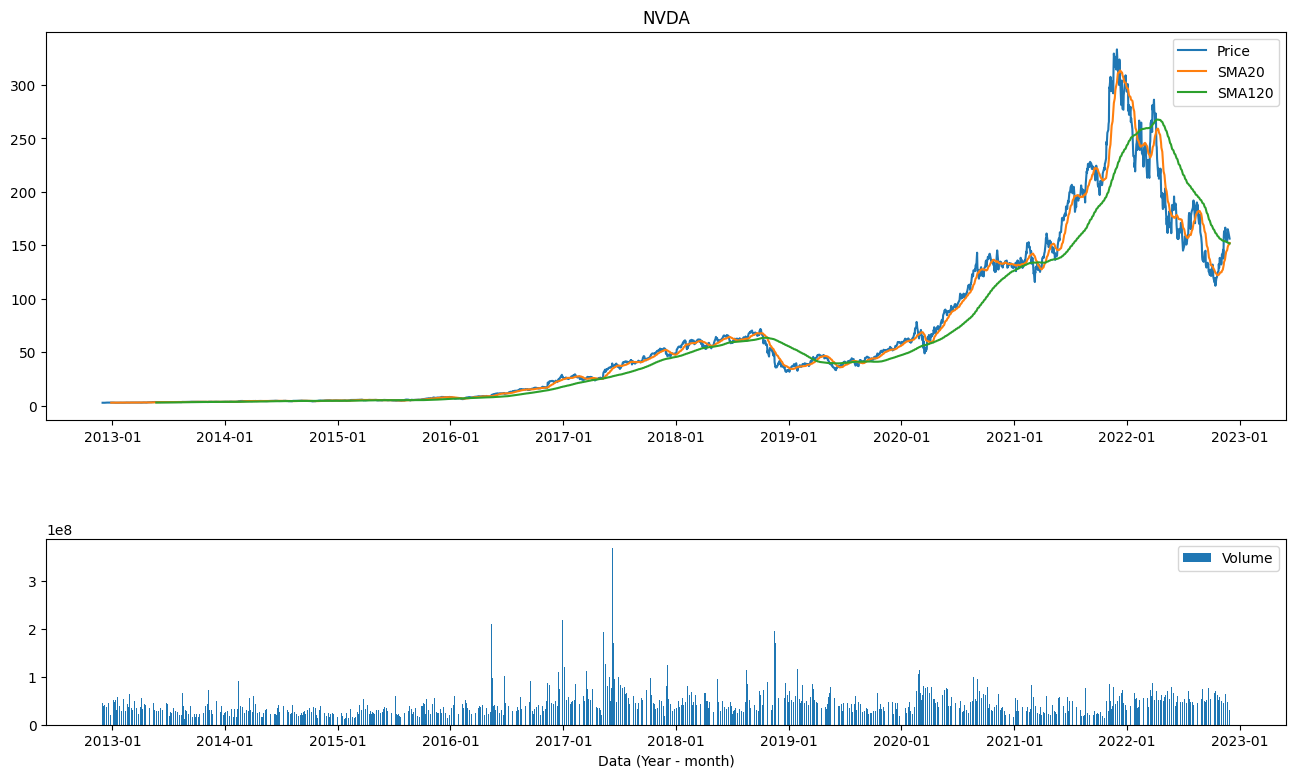

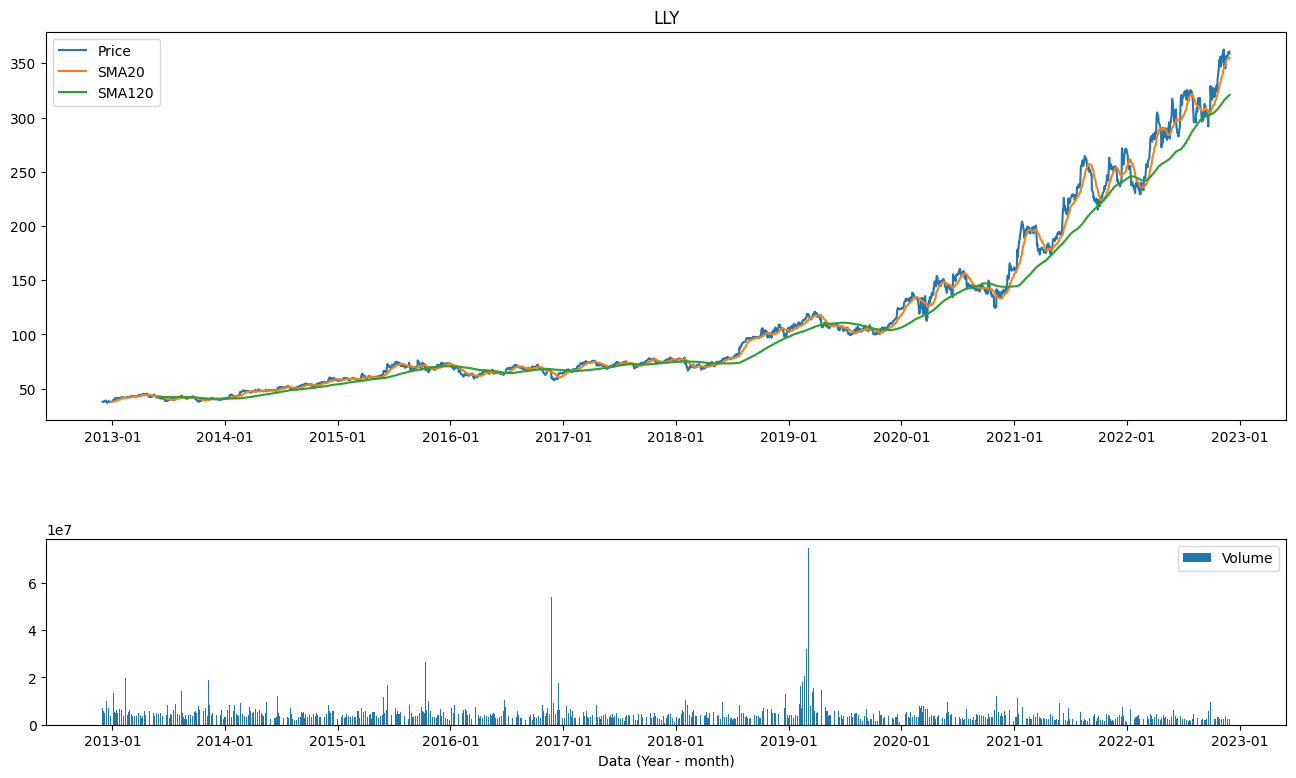

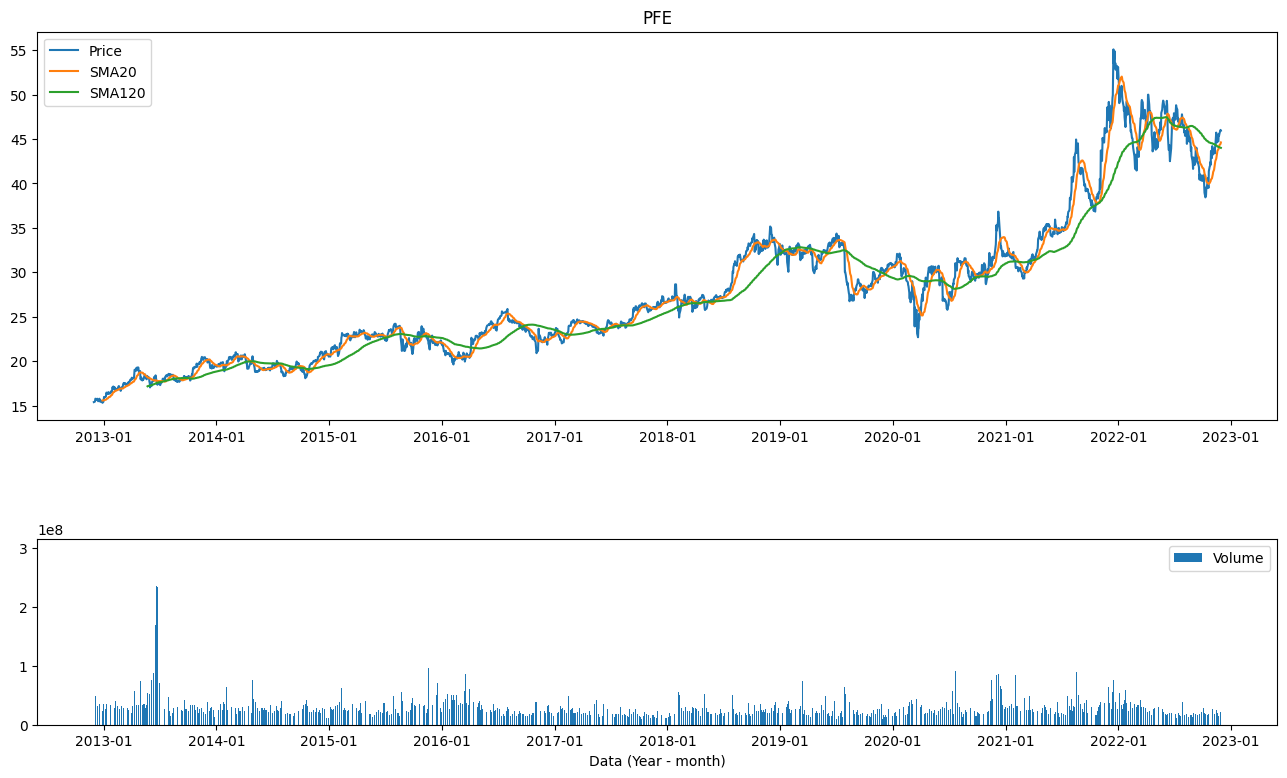

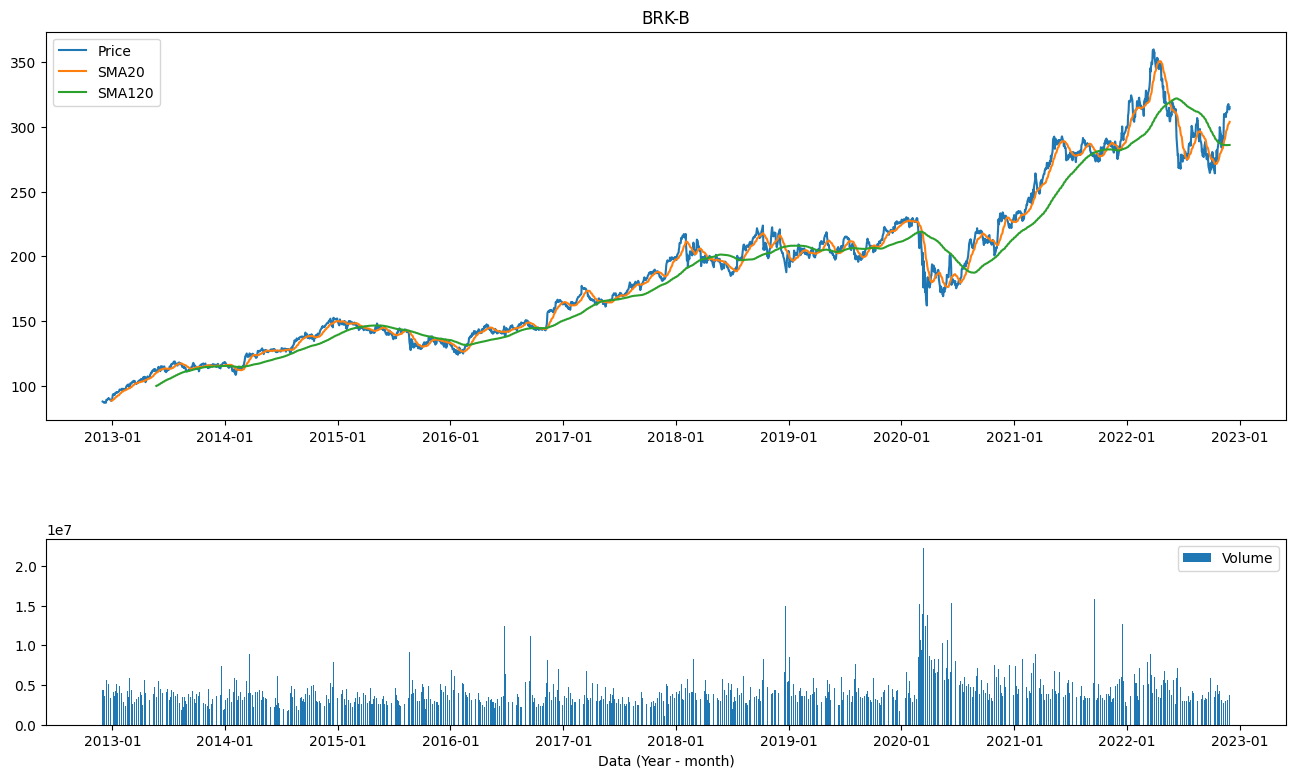

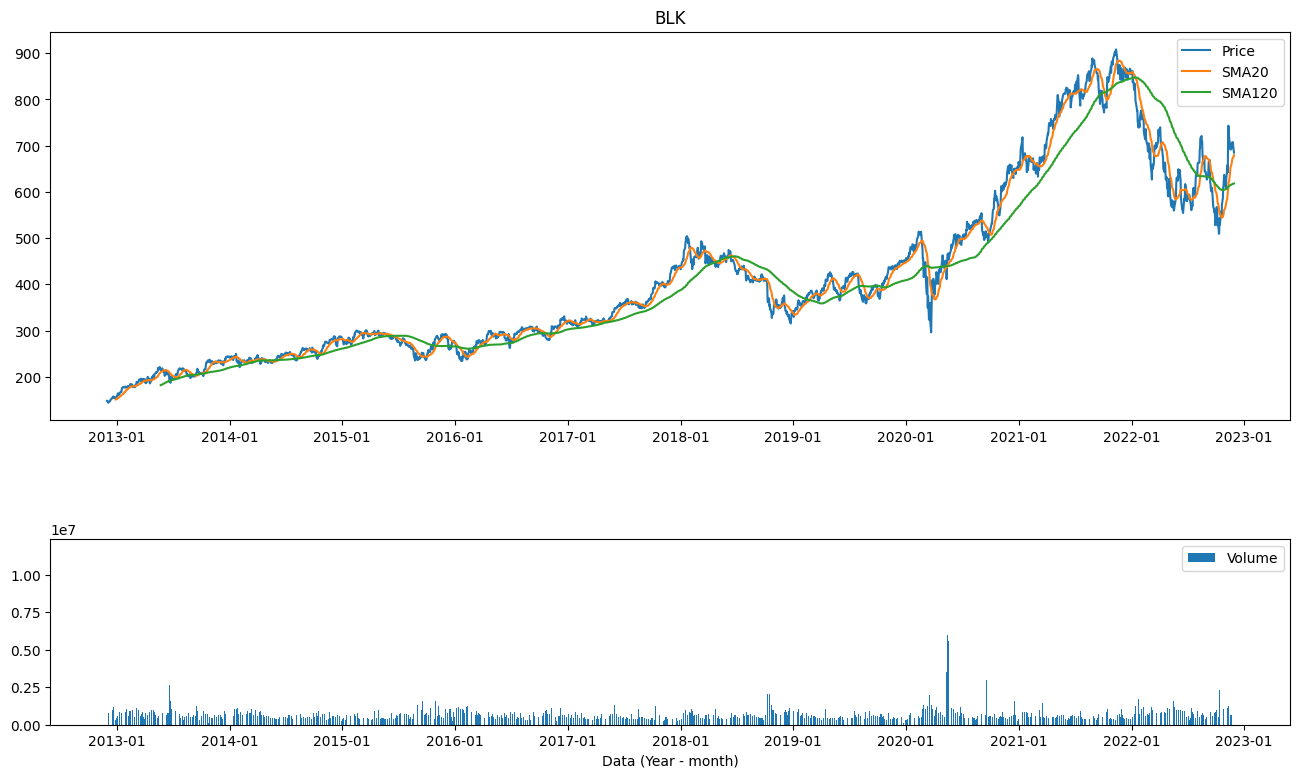

In [73]:
for ticker in tickers:
    df_name = "df_" + ticker
    df = dfs[df_name]

    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
    ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax1.plot(df['Adj Close'], label = 'Price')
    ax1.plot(df['SMA20'], label = 'SMA20')
    ax1.plot(df['SMA120'], label = 'SMA120')

    ax2.bar(df.index, df['Volume'], label = 'Volume')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.set_xlabel('Data (Year - month)')
    ax1.legend()
    ax2.legend()

In [75]:
smas = {}
# implementazione della strategia e rendimenti
for ticker in tickers:
    df_name = "df_" + ticker
    data = dfs[df_name]

    data['Price_yesterday'] = data['Adj Close'].shift(1)
    data['Change'] = data['Adj Close'] / data['Price_yesterday']
    data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                            else 0 for i in data.index]

    sma = "sma_" + ticker
    smas[sma] = data[data['Invested_SMA'] == 1]

In [76]:
for ticker in tickers:
    smas["sma_" + ticker]['Return'] = np.cumprod(smas["sma_" + ticker]['Change'])

C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\3977734250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smas["sma_" + ticker]['Return'] = np.cumprod(smas["sma_" + ticker]['Change'])
C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\3977734250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smas["sma_" + ticker]['Return'] = np.cumprod(smas["sma_" + ticker]['Change'])
C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\3977734250.py:2: SettingWithCopyWarning: 
A 

In [78]:
for ticker in tickers:
    smas["sma_" + ticker]['rtn'] = smas["sma_" + ticker]['Return'].pct_change()
    smas["sma_" + ticker]['rtn'].std()*np.sqrt(252)
    smas["sma_" + ticker]['rtn'].mean()*252 / (smas["sma_" + ticker]['rtn'].std()*np.sqrt(252))

C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\2790321987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smas["sma_" + ticker]['rtn'] = smas["sma_" + ticker]['Return'].pct_change()
C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\2790321987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smas["sma_" + ticker]['rtn'] = smas["sma_" + ticker]['Return'].pct_change()
C:\Users\Alessandro Zanotti\AppData\Local\Temp\ipykernel_9700\2790321987.py:2: SettingWithCopyWarning: 
A valu

In [79]:
smas["sma_AVGO"]

Adj Close   Volume       SMA20      SMA120  Price_yesterday  \
Date                                                                       
2013-05-30   28.173283  8260700   25.317597   25.257209        25.647980   
2013-05-31   28.106249  3343200   25.527668   25.275631        28.173283   
2013-06-03   27.785929  2721000   25.729545   25.296729        28.106249   
2013-06-04   28.158392  3312000   25.915778   25.319702        27.785929   
2013-06-05   27.562458  1501900   26.081898   25.337032        28.158392   
...                ...      ...         ...         ...              ...   
2022-04-26  531.866272  3580900  570.344809  560.049233       558.275818   
2022-04-27  531.362915  1931300  566.454602  560.241039       531.866272   
2022-04-28  549.786072  2233400  563.978412  560.537555       531.362915   
2022-11-28  504.216919  2350500  481.073758  479.095206       511.651611   
2022-11-29  503.425171  1269400  483.548930  478.816334       504.216919   

              Change  Invested_SMA    Return       rtn  
Date                                                    
2013-05-30  1.098460             1  1.098460       NaN  
2013-05-31  0.997621             1  1.095847 -0.002379  
2013-06-03  0.988603             1  1.083357 -0.011397  
2013-06-04  1.013405             1  1.097880  0.013405  
2013-06-05  0.978836             1  1.074644 -0.021164  
...              ...           ...       ...       ...  
2022-04-26  0.952694             1  9.182800 -0.047306  
2022-04-27  0.999054             1  9.174109 -0.000946  
2022-04-28  1.034672             1  9.492190  0.034672  
2022-11-28  0.985469             1  9.354261 -0.014531  
2022-11-29  0.998430             1  9.339572 -0.001570  

[1847 rows x 9 columns]

In [80]:
# rendimento del "Buy and Hold"
for ticker in tickers:
    df_name = "df_" + ticker
    data = dfs[df_name]
    data['Buy_and_hold'] = np.cumprod(data['Change'])
    data['rtn'] = data['Buy_and_hold'].pct_change()
    data['rtn'].std()

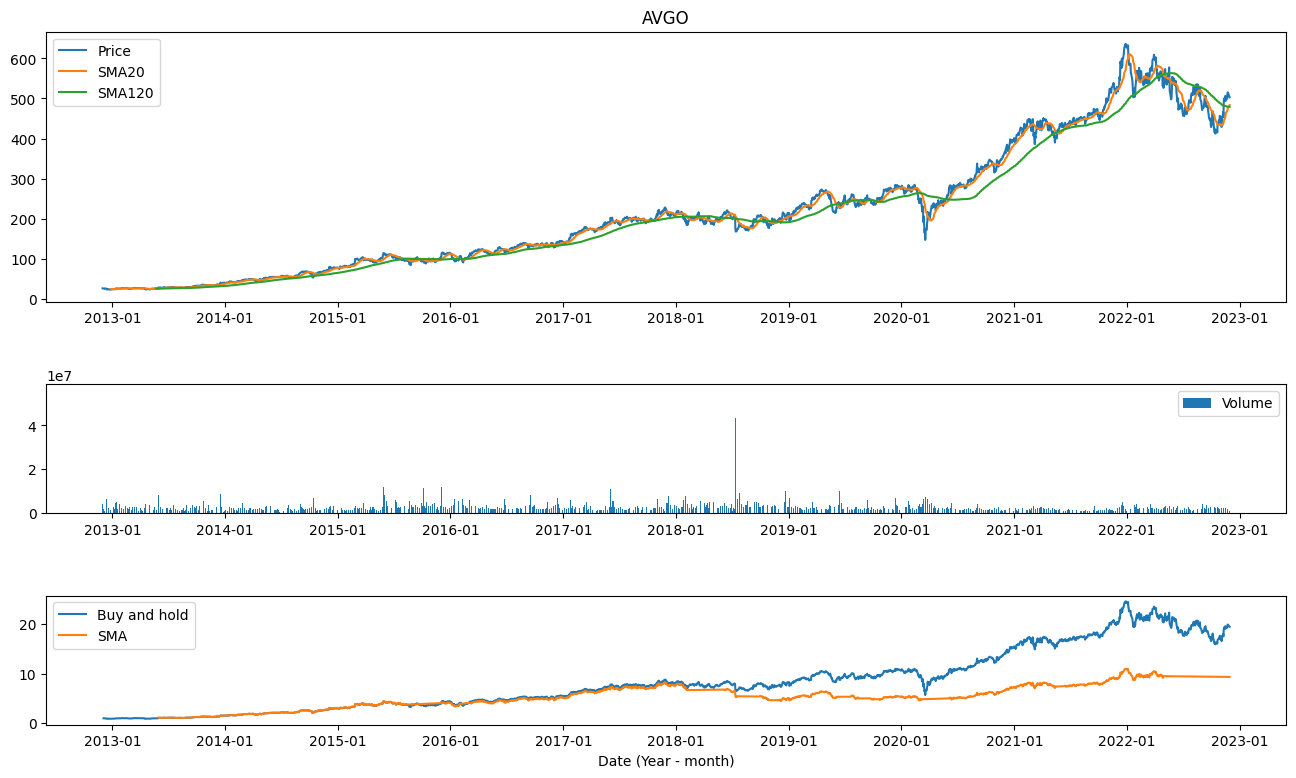

C:\Users\Alessandro Zanotti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


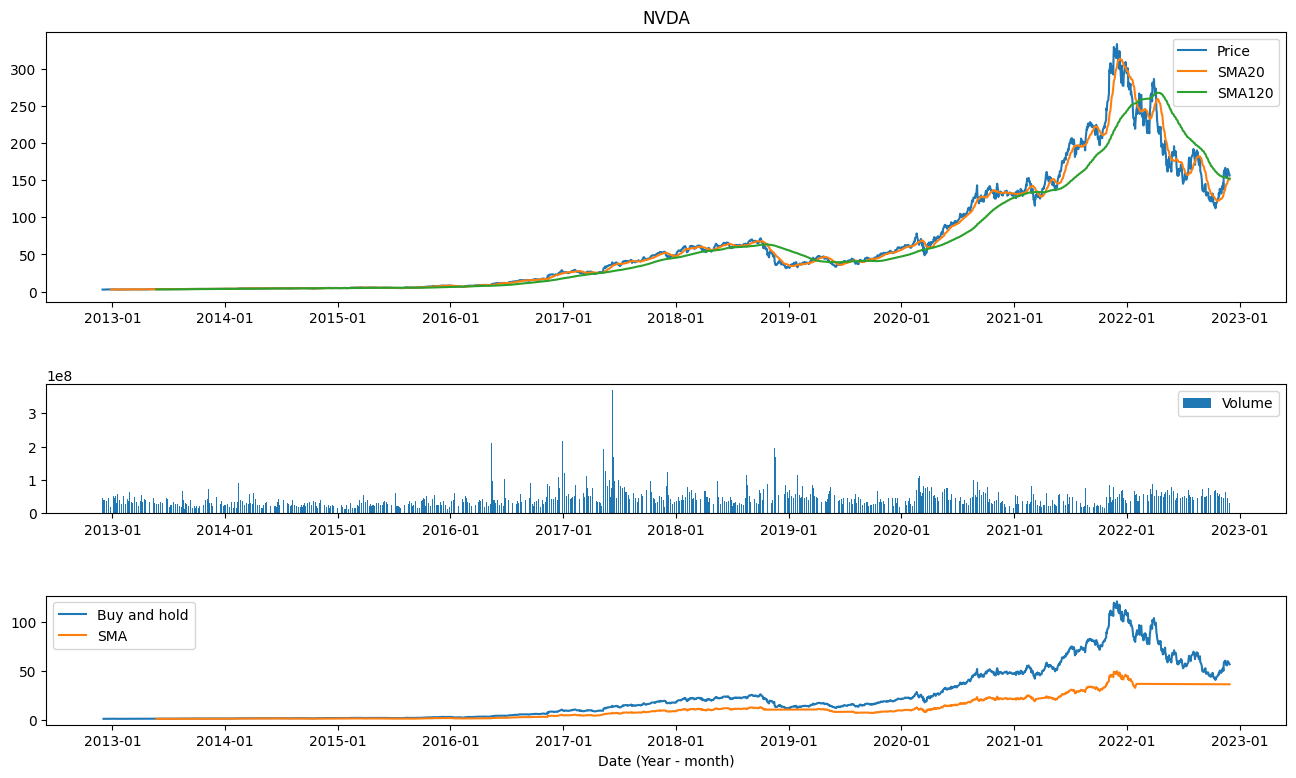

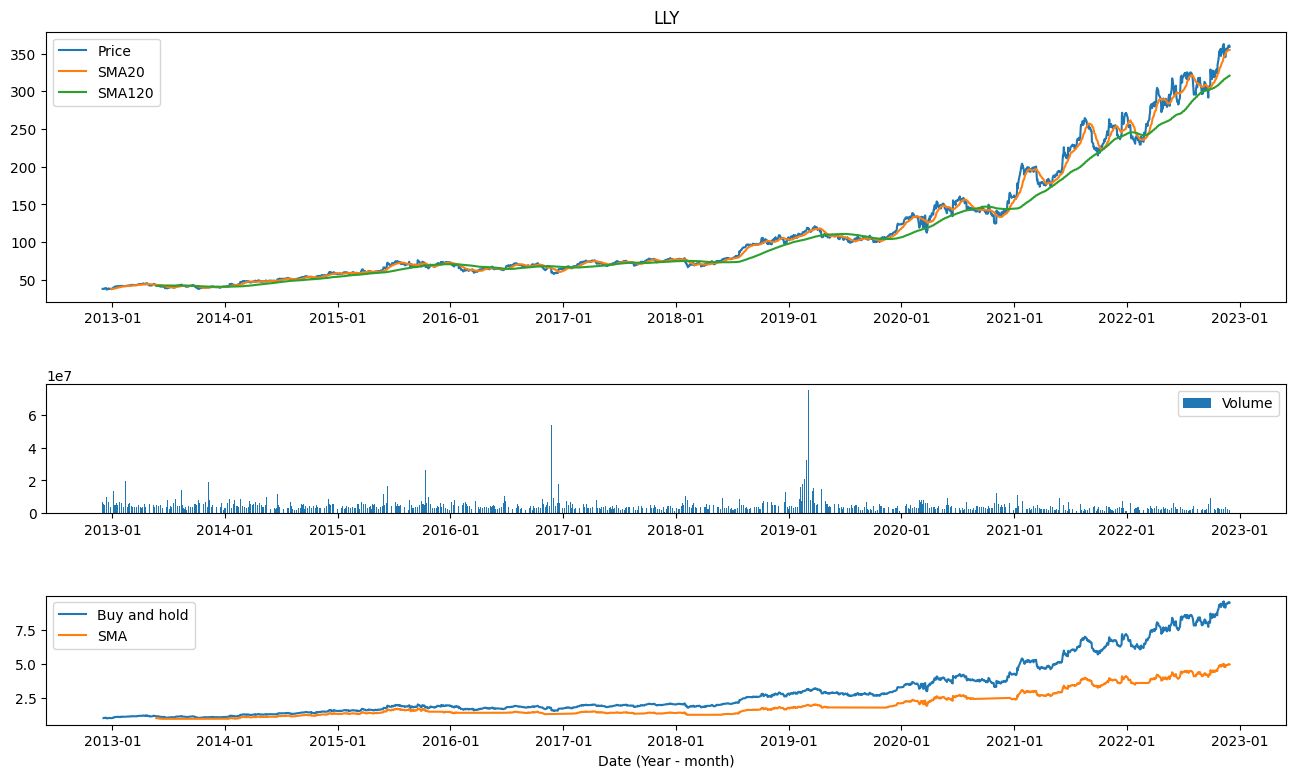

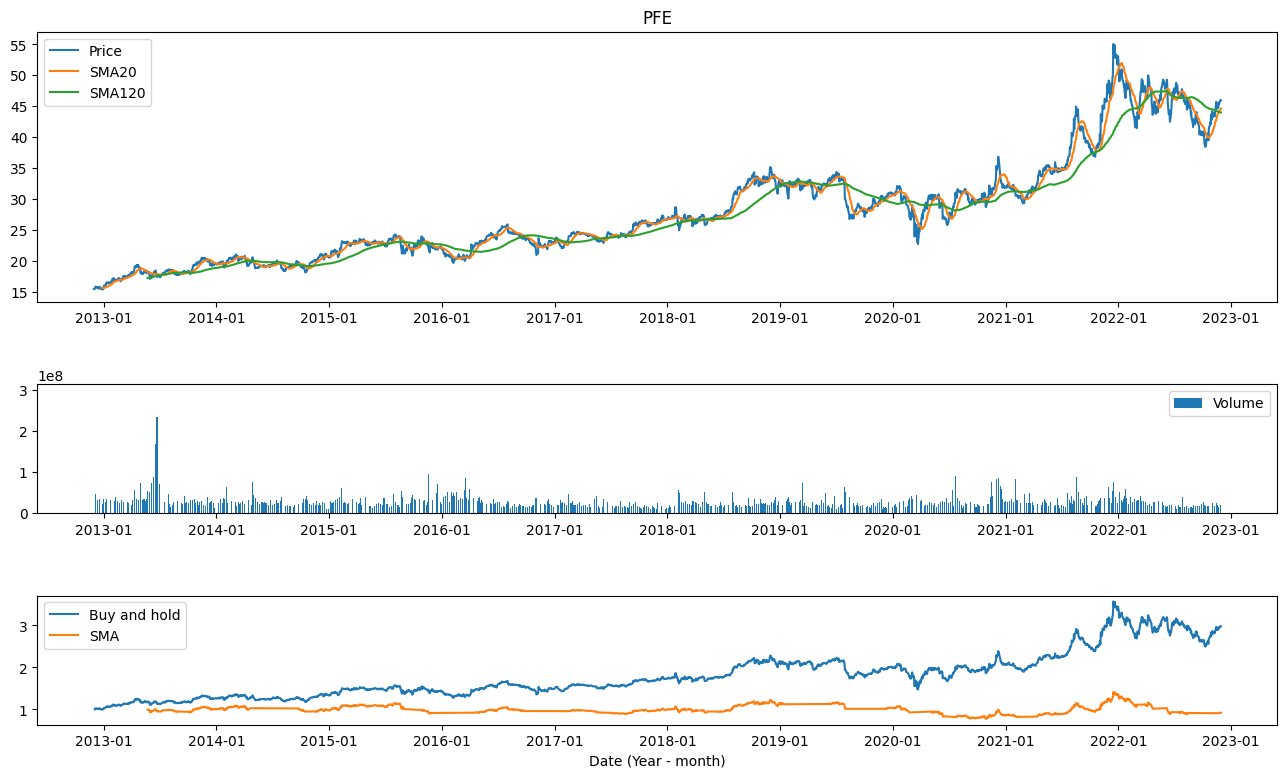

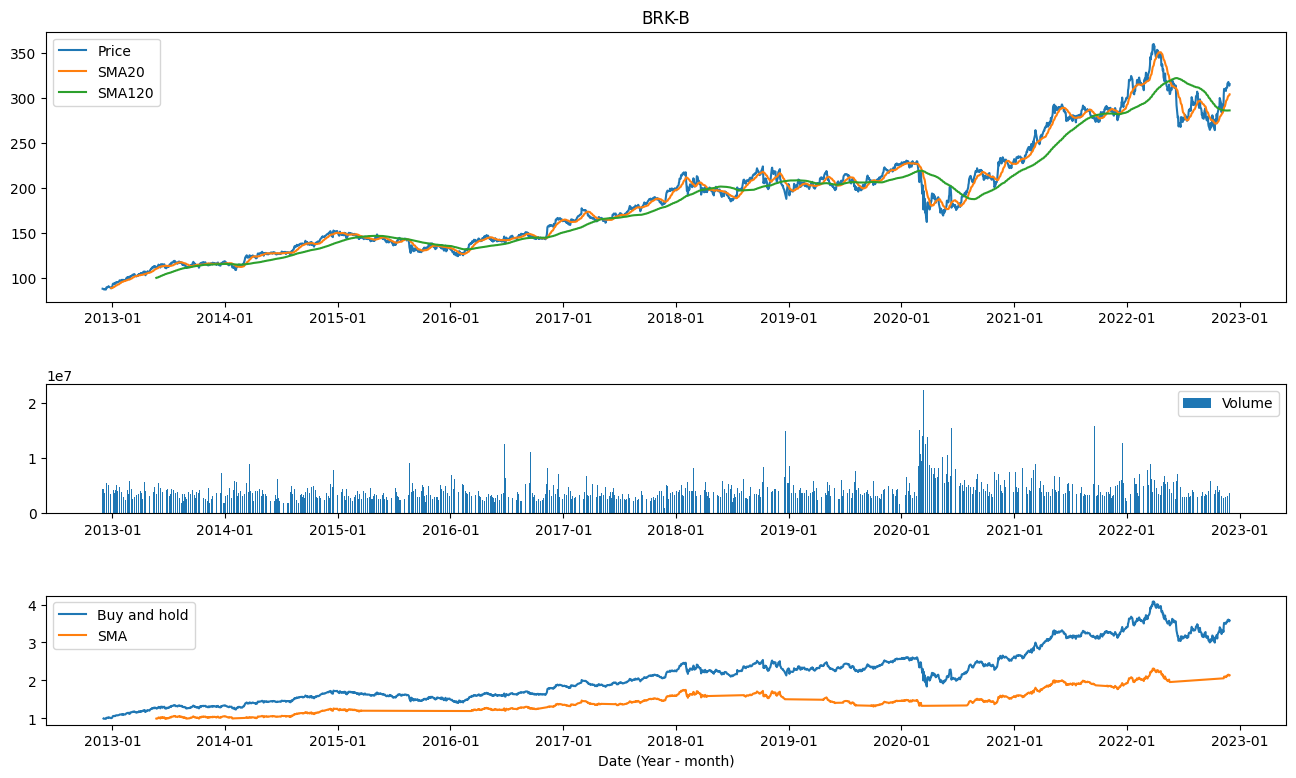

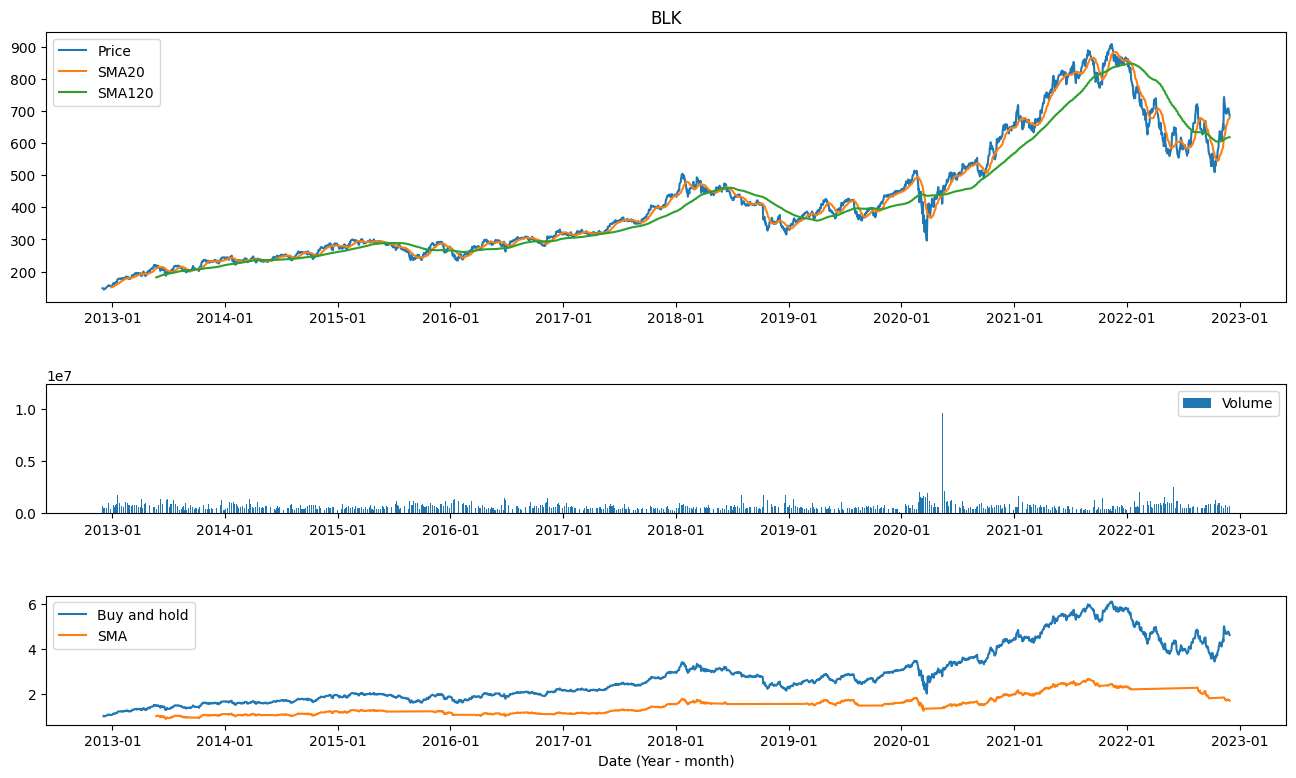

In [81]:
# confronto tra i rendimenti
for ticker in tickers:
    df_data = dfs["df_" + ticker]
    sma_data = smas["sma_" + ticker]

    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax1.plot(df_data['Adj Close'], label = 'Price')
    ax1.plot(df_data['SMA20'], label = 'SMA20')
    ax1.plot(df_data['SMA120'], label = 'SMA120')

    ax2.bar(df_data.index, df_data['Volume'], label = 'Volume')
    ax3.plot(df_data['Buy_and_hold'], label = 'Buy and hold')
    ax3.plot(sma_data['Return'], label = 'SMA')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax3.set_xlabel('Date (Year - month)')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.show()

In [82]:
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [84]:
# download dataframs con market benchmark e risk free
start_date = '2012-11-30'
end_date = '2022-11-30'
market_benchmark = '^GSPC'
risk_free = '^IRX'
tickers = ["AVGO", "NVDA", "LLY", "PFE", "BRK-B", "BLK"]
data_capm = {}

for ticker in tickers:
    df_name = "capm_" + ticker
    data_capm[df_name] = yf.download([ticker, market_benchmark, risk_free], start=start_date, end=end_date)

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [86]:
# calcolo beta vs market benchmark
assets_beta = {}
for ticker in tickers:
    beta_name = 'beta_' + ticker
    X = data_capm['capm_' + ticker]['Adj Close'].rename(columns={ticker:'asset', market_benchmark:'market', risk_free: 'risk_free'})
    X = X.resample('ME').mean()

    # calcolo del market risk free rate
    X['mrf'] = (1 + X['risk_free']/100)**(30/360) - 1

    # calcolo dell'asset risk premium
    X['asset_nmr'] = X['asset'].pct_change() - X['mrf']

    # calcolo del market risk premium
    X['market_nmr'] = X['market'].pct_change() - X['mrf']

    X.dropna(inplace=True)
    X2 = X[['asset_nmr', 'market_nmr']]

    covariance = X2.cov().iloc[0,1]
    benchmark_variance = X2['market_nmr'].var()
    assets_beta[beta_name] = covariance / benchmark_variance

    y = X2.pop('asset_nmr')
    X = sm.add_constant(X2)

    model = sm.OLS(y, X).fit()
    print('\n'+ticker+'\n')
    print(model.summary())


AVGO

                            OLS Regression Results                            
Dep. Variable:              asset_nmr   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     51.75
Date:                Sun, 26 May 2024   Prob (F-statistic):           6.28e-11
Time:                        16:19:10   Log-Likelihood:                 173.44
No. Observations:                 120   AIC:                            -342.9
Df Residuals:                     118   BIC:                            -337.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0168      0.005      3.104  

In [87]:
for beta in assets_beta:
    print(beta + ': ', assets_beta[beta])

beta_AVGO:  1.1335411974782565
beta_NVDA:  1.8329235675028452
beta_LLY:  0.3195842035219612
beta_PFE:  0.709331677528808
beta_BRK-B:  0.8155954690839049
beta_BLK:  1.5177092953795785


In [89]:
import urllib.request
import zipfile
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
# Download the file and save it
# We will name it fama_french.zip file
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
# Next we extact the file data
# We will call it ff_factors.csv
zip_file.extractall()
# Make sure you close the file after extraction
zip_file.close()
import pandas as pd
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3)

In [90]:
# download dataframes per fama-french
start_date = '2012-11-30'
end_date = '2022-11-30'
tickers = ["AVGO", "NVDA", "LLY", "PFE", "BRK-B", "BLK"]
data_fama_french = {}

for ticker in tickers:
    df_name = "ff_df_" + ticker
    data_fama_french[df_name] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [91]:
# eliminazione dati annuali
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

In [92]:
# rinominazione colonne
factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")

In [93]:
factor_df.head()

data       mkt       smb       hml        rf
0  1926-07      2.96     -2.56     -2.43      0.22
1  1926-08      2.64     -1.17      3.82      0.25
2  1926-09      0.36     -1.40      0.13      0.23
3  1926-10     -3.24     -0.09      0.70      0.32
4  1926-11      2.53     -0.10     -0.51      0.31

In [94]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start_date:end_date]
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

In [95]:
factor_df.head()

mkt     smb     hml      rf
data                                   
2012-12  0.0118  0.0148  0.0351  0.0001
2013-01  0.0557  0.0033  0.0096  0.0000
2013-02  0.0129 -0.0027  0.0011  0.0000
2013-03  0.0403  0.0081 -0.0019  0.0000
2013-04  0.0155 -0.0237  0.0045  0.0000

In [96]:
factor_df.tail()

mkt     smb     hml      rf
data                                   
2022-07  0.0957  0.0281 -0.0405  0.0008
2022-08 -0.0377  0.0140  0.0029  0.0019
2022-09 -0.0935 -0.0081  0.0005  0.0019
2022-10  0.0783  0.0006  0.0801  0.0023
2022-11  0.0460 -0.0352  0.0138  0.0029

In [98]:
for ticker in tickers:
    df_name = "ff_df_" + ticker

    y = data_fama_french[df_name]['Adj Close'].resample('ME').last().pct_change().dropna()
    y.index = y.index.strftime('%Y-%m')
    y.name = 'rtn'

    # uniamo i dati
    ff_data = factor_df.join(y)
    ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

    # salvo i dati per calcolare il beta
    risk_free = ff_data['rf'].mean()
    market_premium = ff_data['mkt'].mean()

    # stimiamo il modello a 3 fattori
    ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
    print('\n' + ticker + '\n')
    print(ff_model.summary())


AVGO

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sun, 26 May 2024   Prob (F-statistic):           7.75e-10
Time:                        16:23:03   Log-Likelihood:                 152.54
No. Observations:                 120   AIC:                            -297.1
Df Residuals:                     116   BIC:                            -285.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0164      0.007      2.519  

In [99]:
# rendimenti attesi per ogni asset con CAPM
prev_ret = {}
for ticker in tickers:
    rtn_name = "rtn_" + ticker
    expected_return = risk_free + (assets_beta['beta_' + ticker] * market_premium)
    expected_return = expected_return * 12
    prev_ret[rtn_name] = expected_return
    print(ticker + ': ', expected_return)

AVGO:  0.15231606881965334
NVDA:  0.24227062925221593
LLY:  0.04762492025699465
PFE:  0.0977542403637553
BRK-B:  0.11142188923357185
BLK:  0.2017277695717214


In [100]:
# configurazione plotter
plt.style.use('seaborn')
sns.set_palette('cubehelix')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [101]:
# download prezzi e impostazioni per il portafoglio
n_port = 10 ** 5
n_days = 252
start_date = '2012-11-30'
end_date = '2021-11-30'
tickers = ["AVGO", "NVDA", "LLY", "PFE", "BRK-B", "BLK"]
n_assets = len(tickers)

opt_df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  6 of 6 completed


In [102]:
returns_df = opt_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * n_days
cov_mat = returns_df.cov() * n_days

In [103]:
# funzione per calcolare rendimento e varianza di un portafoglio
def calcola_rendimento_varianza_portafoglio(pesi, rendimenti_attesi, matrice_covarianza):
    rendimento_portafoglio = np.sum(rendimenti_attesi * pesi)
    varianza_portafoglio = np.dot(pesi.T, np.dot(matrice_covarianza, pesi))
    return rendimento_portafoglio, varianza_portafoglio

In [104]:
# funzione per generare portafogli casuali
def monte_carlo(rendimenti_attesi, matrice_covarianza, num_portafogli):
    num_societa = len(rendimenti_attesi)
    risultati = np.zeros((3, num_portafogli))
    pesi_casuali = []

    for i in range(num_portafogli):
        pesi = np.random.random(num_societa)
        pesi /= np.sum(pesi)
        pesi_casuali.append(pesi)
        rendimento_portafoglio, varianza_portafoglio = calcola_rendimento_varianza_portafoglio(pesi, rendimenti_attesi, matrice_covarianza)
        risultati[0, i] = rendimento_portafoglio
        risultati[1, i] = varianza_portafoglio
        risultati[2, i] = risultati[0, i] / risultati[1, i]  # Rapporto rendimento/varianza

    return risultati, pesi_casuali

In [105]:
num_portafogli = 10000  # Numero di portafogli casuali da generare
risultati, pesi_casuali = monte_carlo(avg_returns, cov_mat, num_portafogli)

In [106]:
indice_migliore = np.argmax(risultati[2])
pesi_migliori = pesi_casuali[indice_migliore]
rendimento_migliore, varianza_migliore = risultati[0, indice_migliore], risultati[1, indice_migliore]

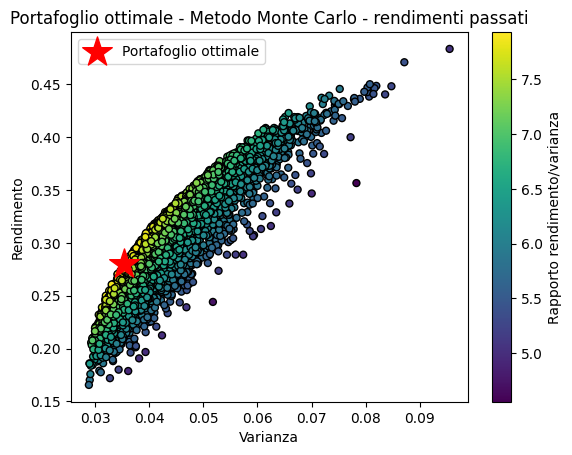

In [107]:
# frontiera efficiente - metodo Monte Carlo - rendimenti passati
plt.scatter(risultati[1, :], risultati[0, :], c=risultati[2, :], cmap='viridis', edgecolors='black', s=25)
plt.colorbar(label='Rapporto rendimento/varianza')
plt.scatter(varianza_migliore, rendimento_migliore, marker='*', color='r', s=500, label='Portafoglio ottimale')
plt.xlabel('Varianza')
plt.ylabel('Rendimento')
plt.title('Portafoglio ottimale - Metodo Monte Carlo - rendimenti passati')
plt.legend()
plt.show()

In [108]:
# media rendimenti previsti in prev_ret
rendimenti_attesi = np.array(list(prev_ret.values()))

In [109]:
num_portafogli = 10000  # Numero di portafogli casuali da generare
risultati, pesi_casuali = monte_carlo(rendimenti_attesi, cov_mat, num_portafogli)

In [110]:
indice_migliore = np.argmax(risultati[2])
pesi_migliori = pesi_casuali[indice_migliore]
rendimento_migliore, varianza_migliore = risultati[0, indice_migliore], risultati[1, indice_migliore]

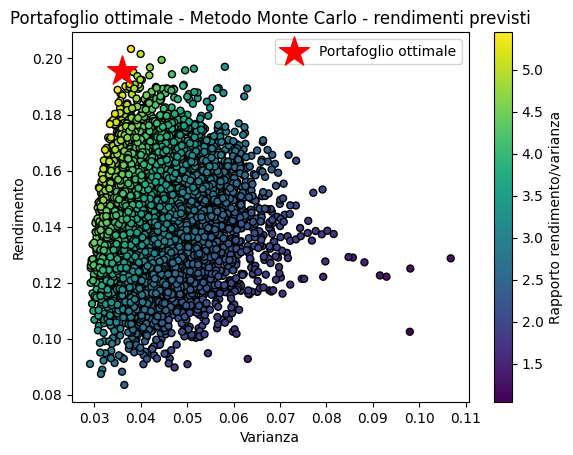

In [111]:
# frontiera efficiente - metodo Monte Carlo - rendimenti previsti
plt.scatter(risultati[1, :], risultati[0, :], c=risultati[2, :], cmap='viridis', edgecolors='black', s=25)
plt.colorbar(label='Rapporto rendimento/varianza')
plt.scatter(varianza_migliore, rendimento_migliore, marker='*', color='r', s=500, label='Portafoglio ottimale')
plt.xlabel('Varianza')
plt.ylabel('Rendimento')
plt.title('Portafoglio ottimale - Metodo Monte Carlo - rendimenti previsti')
plt.legend()
plt.show()

In [112]:
# beta del portafoglio rispetto al mercato (rendimento indice SP500 e miglior rendimento atteso portafoglio)
beta = rendimento_migliore / rendimenti_attesi

print("Beta del portafoglio:", beta)

Beta del portafoglio: [1.28327778 0.80679952 4.10423421 1.9995432  1.75426775 0.96894854]
